In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress
from tabulate import tabulate

columns_to_sum = ['Iron', 'Al','Fe','Silicon','Aluminum','Calcium','Manganese','Mn','Potassium','K','Ca','Si']

OM;   EC;   NO3-;    SO4-;   NH4+;     Cl-;    mineral dust(MD)

Unaccounted: the difference between the PM2.5 gravimetric mass and the sum of the PM constituents (OM, EC, SO2− 4 , NO− 3 , NH+ 4 , Mineral dust and Cl−)

In [3]:
speciesDG = pd.read_excel('speciesDG.xlsx')

In [4]:
speciesNS = pd.read_excel('speciesNS.xlsx')
speciesGZ = pd.read_excel('speciesGZ.xlsx')
speciesNH = pd.read_excel('speciesNH.xlsx')
speciesDG = pd.read_excel('speciesDG.xlsx')

In [4]:
# DG 200807 - 201411

In [5]:
speciesNH.head()

,Unnamed: 0,date,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT,...,Manganese,Iron,Al,Si,Mn,Fe,PM2.5,Na,MD,species
0,0,2008-01-01,115.400767,11.038004,2.051079,7.265366,14.071695,18.984675,28.072316,4.959829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,115.271432
1,1,2008-02-01,66.728548,7.503313,1.250673,5.199129,9.544714,13.333987,11.750027,3.165896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,63.422097
2,2,2008-03-01,160.084552,16.518590,2.591981,6.845976,26.435403,30.129067,35.722674,6.214675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,161.161326
3,3,2008-04-01,80.840850,9.543879,1.509100,3.955229,9.085568,19.492765,14.764564,4.389214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,77.472241
4,4,2008-05-01,86.767778,11.217818,1.551281,3.288739,12.486296,21.310384,13.747099,3.951165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,81.123310


Text(0, 0.5, 'concentration (ug/m₃)')

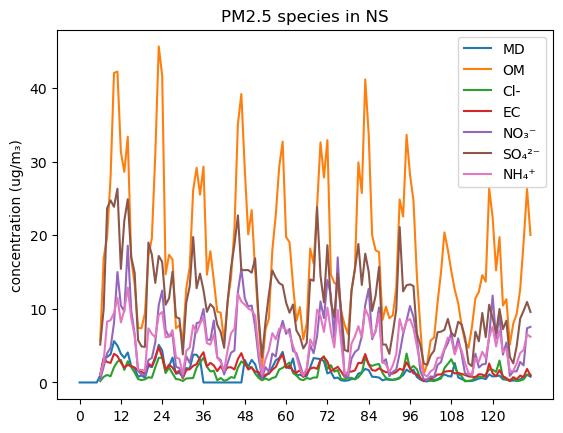

In [6]:
plt.plot(speciesNS.index, speciesNS['MD'], label='MD')
plt.plot(speciesNS.index, speciesNS['OM'].replace(0,np.nan), label='OM')
plt.plot(speciesNS['Cl-'],label='Cl-')
plt.plot(speciesNS['EC_TOT'],label= 'EC')
plt.plot(speciesNS['NO3-'], label='NO\u2083\u207B')
plt.plot(speciesNS['SO4='], label='SO\u2084\u00B2\u207B')
plt.plot(speciesNS['NH4+'],label='NH\u2084\u207A')
plt.xticks(range(0, len(speciesNS.index), 12), speciesNS.index[::12])

plt.title('PM2.5 species in NS')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

Text(0, 0.5, 'concentration (ug/m₃)')

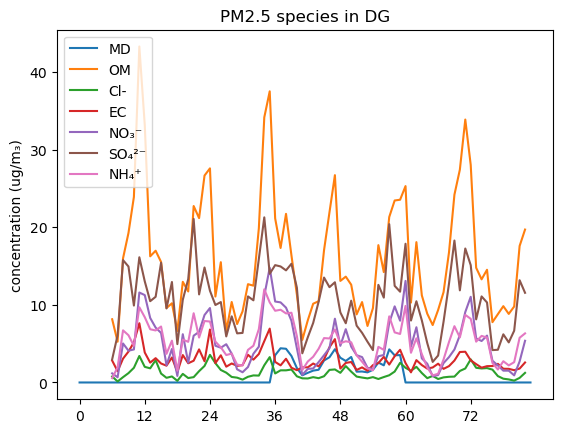

In [7]:
plt.plot(speciesDG.index, speciesDG['MD'], label='MD')
plt.plot(speciesDG.index, speciesDG['OM'].replace(0,np.nan), label='OM')
plt.plot(speciesDG['Cl-'],label='Cl-')
plt.plot(speciesDG['EC_TOT'],label= 'EC')
plt.plot(speciesDG['NO3-'], label='NO\u2083\u207B')
plt.plot(speciesDG['SO4='], label='SO\u2084\u00B2\u207B')
plt.plot(speciesDG['NH4+'],label='NH\u2084\u207A')
plt.xticks(range(0, len(speciesDG.index), 12), speciesDG.index[::12])

plt.title('PM2.5 species in DG')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

Text(0, 0.5, 'concentration (ug/m₃)')

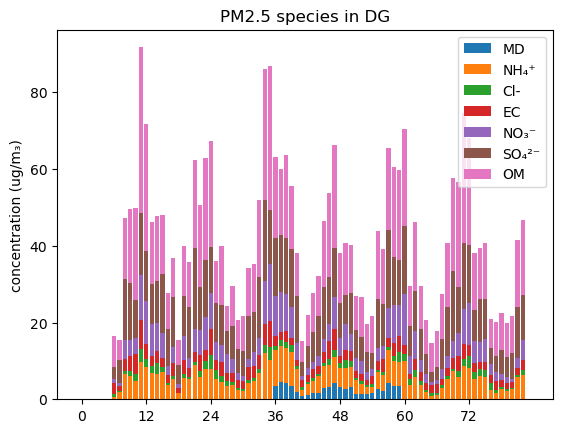

In [8]:
plt.bar(speciesDG.index, speciesDG['MD'], label='MD')
plt.bar(speciesDG.index, speciesDG['NH4+'], bottom=speciesDG['MD'], label='NH\u2084\u207A')
plt.bar(speciesDG.index, speciesDG['Cl-'],  bottom=speciesDG['MD']+  speciesDG['NH4+'], label='Cl-')
plt.bar(speciesDG.index, speciesDG['EC_TOT'], bottom=speciesDG['MD']+speciesDG['NH4+']+speciesDG['Cl-'], label='EC')
plt.bar(speciesDG.index, speciesDG['NO3-'],  bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+speciesDG['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesDG.index, speciesDG['SO4='],  bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+speciesDG['EC_TOT']+speciesDG['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesDG.index, speciesDG['OM'], bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+ speciesDG['EC_TOT'] + speciesDG['NO3-']+speciesDG['SO4='], label='OM')

plt.xticks(range(0, len(speciesDG.index), 12), speciesDG.index[::12])

plt.title('PM2.5 species in DG')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

Text(0, 0.5, 'concentration (ug/m₃)')

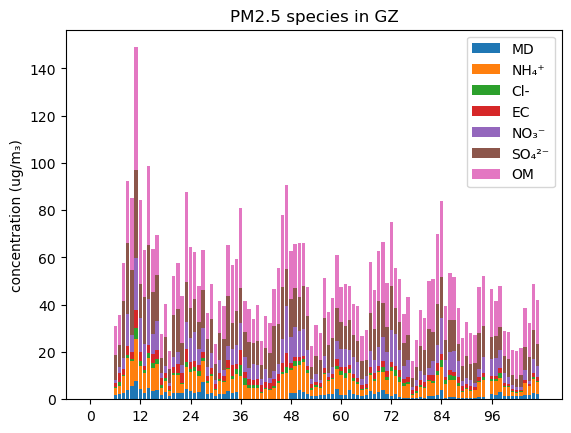

In [9]:
plt.bar(speciesGZ.index, speciesGZ['MD'], label='MD')
plt.bar(speciesGZ.index, speciesGZ['NH4+'], bottom=speciesGZ['MD'], label='NH\u2084\u207A')
plt.bar(speciesGZ.index, speciesGZ['Cl-'], bottom=speciesGZ['MD']+speciesGZ['NH4+'], label='Cl-')
plt.bar(speciesGZ.index, speciesGZ['EC_TOT'], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-'], label='EC')
plt.bar(speciesGZ.index, speciesGZ['NO3-'], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-']+speciesGZ['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesGZ.index, speciesGZ['SO4='], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-']+speciesGZ['EC_TOT']+speciesGZ['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesGZ.index, speciesGZ['OM'], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-']+speciesGZ['EC_TOT']+speciesGZ['NO3-']+speciesGZ['SO4='], label='OM')

plt.xticks(range(0, len(speciesGZ.index), 12), speciesGZ.index[::12])

plt.title('PM2.5 species in GZ')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

Text(0, 0.5, 'concentration (ug/m₃)')

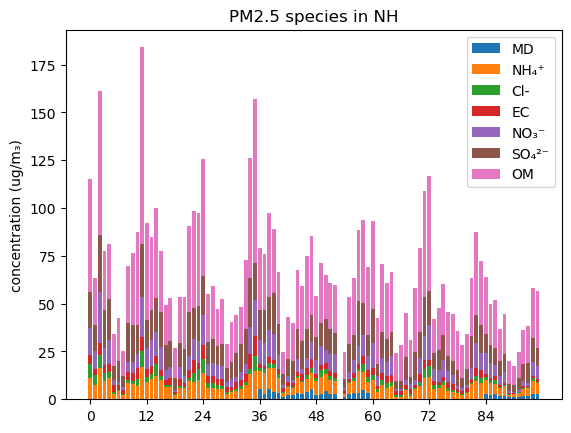

In [10]:
plt.bar(speciesNH.index, speciesNH['MD'], label='MD')
plt.bar(speciesNH.index, speciesNH['NH4+'], bottom=speciesNH['MD'], label='NH\u2084\u207A')
plt.bar(speciesNH.index, speciesNH['Cl-'],  bottom=speciesNH['MD']+  speciesNH['NH4+'], label='Cl-')
plt.bar(speciesNH.index, speciesNH['EC_TOT'], bottom=speciesNH['MD']+speciesNH['NH4+']+speciesNH['Cl-'], label='EC')
plt.bar(speciesNH.index, speciesNH['NO3-'],  bottom=speciesNH['MD']+ speciesNH['NH4+']+speciesNH['Cl-']+speciesNH['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesNH.index, speciesNH['SO4='],  bottom=speciesNH['MD']+ speciesNH['NH4+']+speciesNH['Cl-']+speciesNH['EC_TOT']+speciesNH['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesNH.index, speciesNH['OM'], bottom=speciesNH['MD']+ speciesNH['NH4+']+speciesNH['Cl-']+ speciesNH['EC_TOT'] + speciesNH['NO3-']+speciesNH['SO4='], label='OM')

plt.xticks(range(0, len(speciesNH.index), 12), speciesNH.index[::12])

plt.title('PM2.5 species in NH')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

Text(0, 0.5, 'concentration (ug/m₃)')

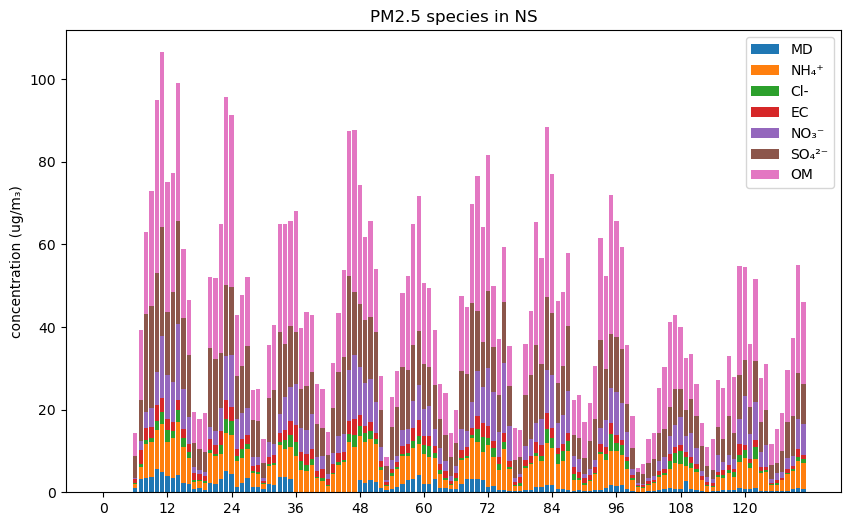

In [11]:
plt.figure(figsize=(10,6))

plt.bar(speciesNS.index, speciesNS['MD'], label='MD')
plt.bar(speciesNS.index, speciesNS['NH4+'], bottom=speciesNS['MD'], label='NH\u2084\u207A')
plt.bar(speciesNS.index, speciesNS['Cl-'],  bottom=speciesNS['MD']+  speciesNS['NH4+'], label='Cl-')
plt.bar(speciesNS.index, speciesNS['EC_TOT'], bottom=speciesNS['MD']+speciesNS['NH4+']+speciesNS['Cl-'], label='EC')
plt.bar(speciesNS.index, speciesNS['NO3-'],  bottom=speciesNS['MD']+ speciesNS['NH4+']+speciesNS['Cl-']+speciesNS['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesNS.index, speciesNS['SO4='],  bottom=speciesNS['MD']+ speciesNS['NH4+']+speciesNS['Cl-']+speciesNS['EC_TOT']+speciesNS['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesNS.index, speciesNS['OM'], bottom=speciesNS['MD']+ speciesNS['NH4+']+speciesNS['Cl-']+ speciesNS['EC_TOT'] + speciesNS['NO3-']+speciesNS['SO4='], label='OM')

plt.xticks(range(0, len(speciesNS.index), 12), speciesNS.iloc[:,0][::12])

plt.title('PM2.5 species in NS')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

In [12]:
speciesNS.iloc[:,0][::12]

0        0
12      12
24      24
36      36
48      48
60      60
72      72
84      84
96      96
108    108
120    120
Name: Unnamed: 0, dtype: int64

In [13]:
# speciesNH['OM'][3] = speciesNH['OC_TOT'][3]*1.4
# speciesNH['OM'][3]
# #speciesNH['OC_TOT'][3]

In [14]:
type(speciesNH['OM'][4])

numpy.float64

In [15]:
type(np.nan)

float

In [16]:
nan_float64 = np.float64('nan')

# Check the type of the new numpy.float64 NaN object
nan_float64_type = type(nan_float64)
print("Type of nan_float64:", nan_float64_type)

Type of nan_float64: <class 'numpy.float64'>


In [17]:
type(nan_float64)

numpy.float64

Sum up the species and compare with the total PM2.5 measured  
find the OM/OC ratio (1.4 , 1.6 , 1.8 , 2.1 ?)

OM;   EC;   NO3-;    SO4-;   NH4+;     Cl-;    mineral dust(MD)

Unaccounted: the difference between the PM2.5 gravimetric mass and the sum of the PM constituents (OM, EC, SO2− 4 , NO− 3 , NH+ 4 , Mineral dust and Cl−)

In [18]:
speciesNH.columns

Index(['Unnamed: 0', 'date', 'Teflon Mass', 'NH4+', 'K+', 'Cl-', 'NO3-',
       'SO4=', 'OC_TOT', 'EC_TOT', 'K', 'Ca', 'OM', 'Aluminum', 'Silicon',
       'Sulfur', 'Chlorine', 'Potassium', 'Calcium', 'Manganese', 'Iron', 'Al',
       'Si', 'Mn', 'Fe', 'PM2.5', 'Na', 'MD', 'species'],
      dtype='object')

In [19]:
to_sum = ['NH4+','Cl-','NO3-', 'SO4=','OC_TOT', 'EC_TOT','MD']

In [20]:
speciesNH['species'] = speciesNH[to_sum].sum(axis=1)

In [9]:
# NH is missing data for 201206

NH = speciesNH.dropna(subset=['Teflon Mass'])

In [22]:
# for i in range(len(speciesNH)):
#     if pd.isnull(speciesNH['OM'][i]):
#         print('Null')
#     else:
#         print(speciesNH['OM'][i])     
##  index 24-35 is not null

In [23]:
for i in range(len(speciesNH)):
    if pd.isnull(speciesNH['Teflon Mass'][i]):
        speciesNH.loc[i, 'Teflon Mass'] = speciesNH['PM2.5'][i] 

In [24]:
x = range(0,175)

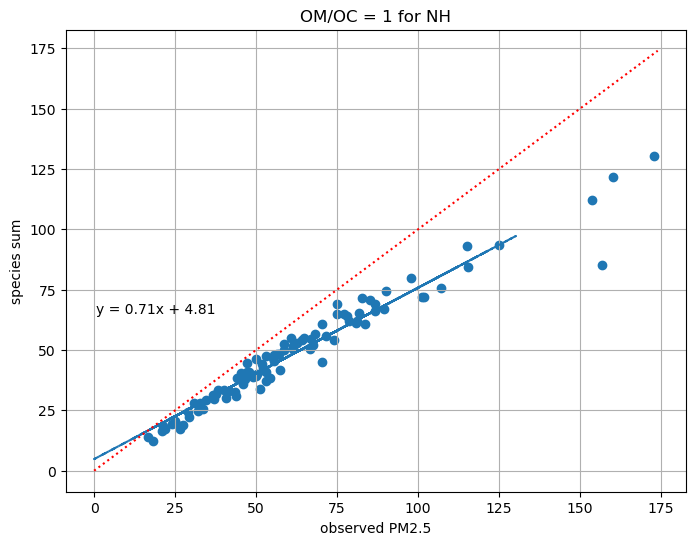

r-squared:  0.9518652104285069


In [25]:
'''missing data for 201206 NH'''
# sum includes OC but no OM

# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesNH['Teflon Mass'], speciesNH['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1 for NH')
plt.grid(True)

# Fit a linear regression model
y = NH['species'].values
X = NH['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesNH['species'], slope * speciesNH['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation) #, color='red')

x = range(0,175)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

print('r-squared: ',model.score(X,y))

In [26]:
speciesNH.iloc[52:55,:]

,Unnamed: 0,date,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT,...,Manganese,Iron,Al,Si,Mn,Fe,PM2.5,Na,MD,species
52,52,2012-05-01,50.017718,6.986746,0.985389,1.833123,9.878692,10.905804,11.956881,2.321867,...,NaN,NaN,0.354912,0.636683,0.045623,0.41911,NaN,NaN,2.533744,46.416857
53,53,2012-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
54,54,2012-07-01,26.649326,1.319796,0.340721,0.368947,1.156749,4.582079,6.854208,1.686196,...,NaN,NaN,0.203767,0.331678,0.022362,0.21319,NaN,NaN,1.316104,17.284078


In [27]:
# use OM/OC = 1.4

for i in range(len(speciesNH)):
    speciesNH.loc[i, 'OM'] = speciesNH['OC_TOT'][i] * 1.4

In [28]:
speciesNH['species'] = speciesNH[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OM', 'EC_TOT', 'MD']].sum(axis=1)

In [29]:
# NH is missing data for 201206

NH = speciesNH.dropna(subset=['Teflon Mass'])

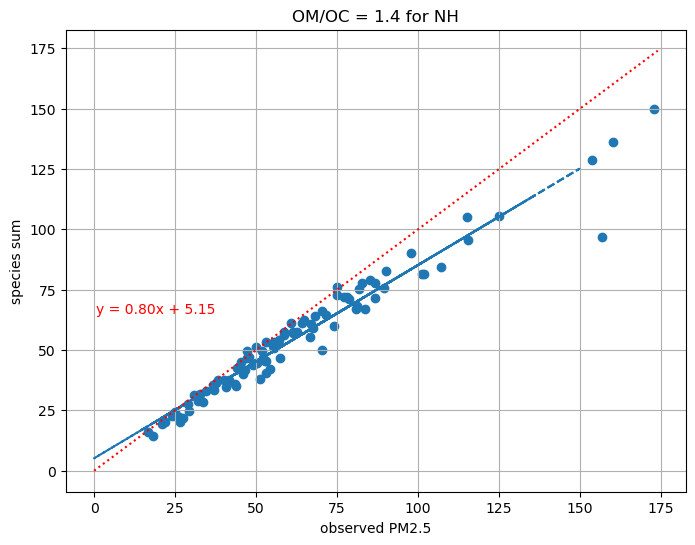

In [30]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesNH['Teflon Mass'], speciesNH['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1.4 for NH')
plt.grid(True)

# Fit a linear regression model
y = NH['species'].values
X = NH['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesNH['species'], slope * speciesNH['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,175)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

In [31]:
for i in range(len(speciesNH)):
    speciesNH.loc[i, 'OM'] = speciesNH['OC_TOT'][i] * 2.1

speciesNH['species'] = speciesNH[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OM', 'EC_TOT', 'MD']].sum(axis=1)

# NH is missing data for 201206

NH = speciesNH.dropna(subset=['Teflon Mass'])

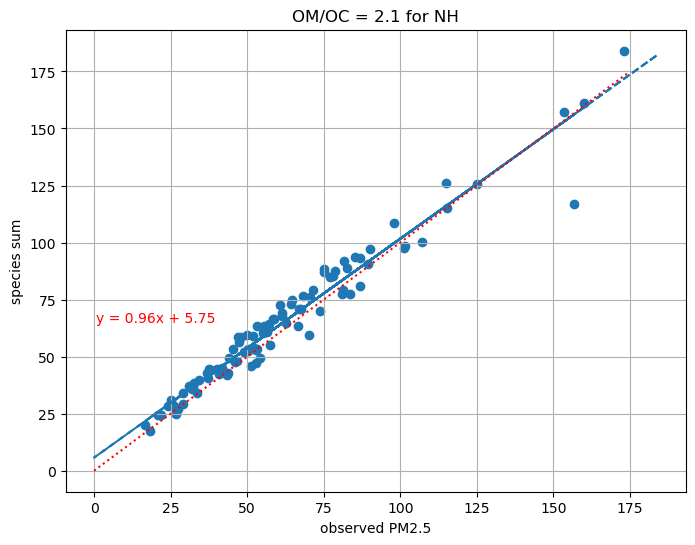

In [32]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesNH['Teflon Mass'], speciesNH['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 2.1 for NH')
plt.grid(True)

# Fit a linear regression model
y = NH['species'].values
X = NH['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesNH['species'], slope * speciesNH['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,175)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

In [33]:
speciesNS.columns

Index(['Unnamed: 0', 'date', 'Teflon Mass', 'NH4+', 'K+', 'Cl-', 'NO3-',
       'SO4=', 'OC_TOT', 'EC_TOT', 'Aluminum', 'Silicon', 'Sulfur', 'Chlorine',
       'Potassium', 'Calcium', 'Manganese', 'Iron', 'Trace_elements', 'K',
       'Ca', 'OM', 'Al', 'Si', 'Mn', 'Fe', 'PM2.5', 'S/SO4', 'MD', 'species'],
      dtype='object')

In [34]:
for i in range(len(speciesNS)):
    if pd.isnull(speciesNS['Teflon Mass'][i]):
        speciesNS.loc[i, 'Teflon Mass'] = speciesNS['PM2.5'][i] 

In [35]:
# for i in range(len(speciesNHS)):
#     speciesNS.loc[i, 'OM'] = speciesNS['OC_TOT'][i] * 2.1

speciesNS['species'] = speciesNS[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OC_TOT', 'EC_TOT', 'MD']].sum(axis=1)

# drop if there's missing data ( NaN )

NS = speciesNS.dropna(subset=['Teflon Mass'])

In [36]:
speciesNS['Teflon Mass'].max()

105.198952977622

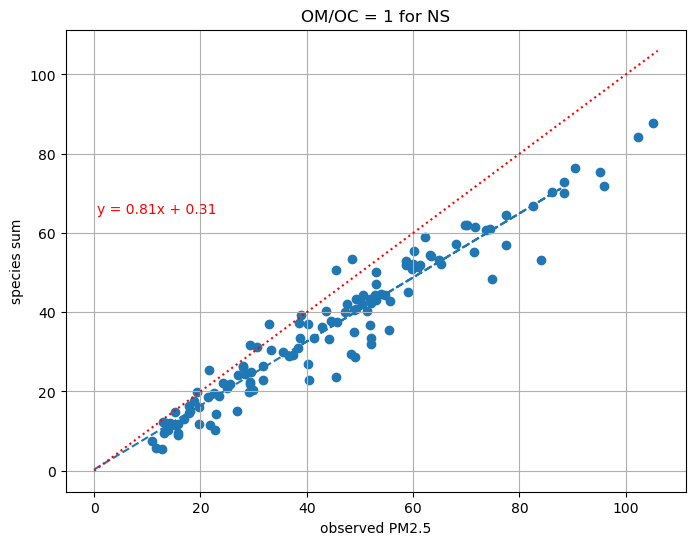

In [37]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesNS['Teflon Mass'], speciesNS['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1 for NS')
plt.grid(True)

# Fit a linear regression model
y = NS['species'].values
X = NS['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesNS['species'], slope * speciesNS['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,107)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

In [38]:
for i in range(len(speciesNS)):
    speciesNS.loc[i, 'OM'] = speciesNS['OC_TOT'][i] * 1.4

speciesNS['species'] = speciesNS[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OM', 'EC_TOT', 'MD']].sum(axis=1)

# drop if there's missing data ( NaN )

NS = speciesNS.dropna(subset=['Teflon Mass'])

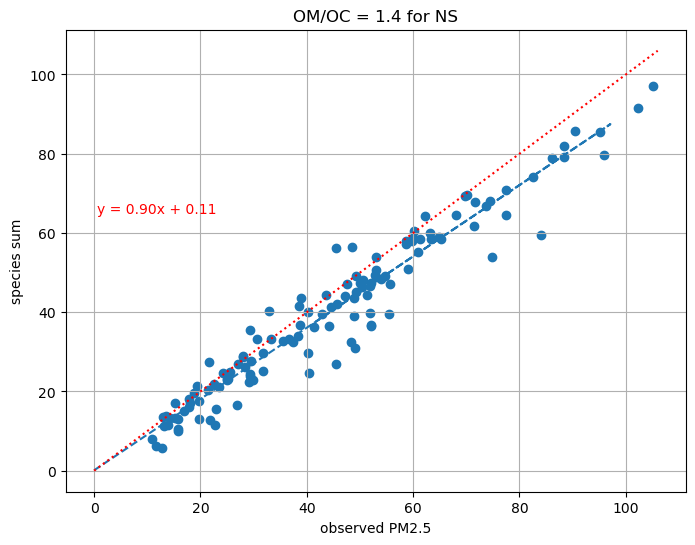

r-squared:  0.9373915919170935


In [39]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesNS['Teflon Mass'], speciesNS['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1.4 for NS')
plt.grid(True)

# Fit a linear regression model
y = NS['species'].values
X = NS['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesNS['species'], slope * speciesNS['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,107)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

print('r-squared: ',model.score(X,y))

In [40]:
for i in range(len(speciesNS)):
    speciesNS.loc[i, 'OM'] = speciesNS['OC_TOT'][i] * 1.8

speciesNS['species'] = speciesNS[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OM', 'EC_TOT', 'MD']].sum(axis=1)

# drop if there's missing data ( NaN )

NS = speciesNS.dropna(subset=['Teflon Mass'])

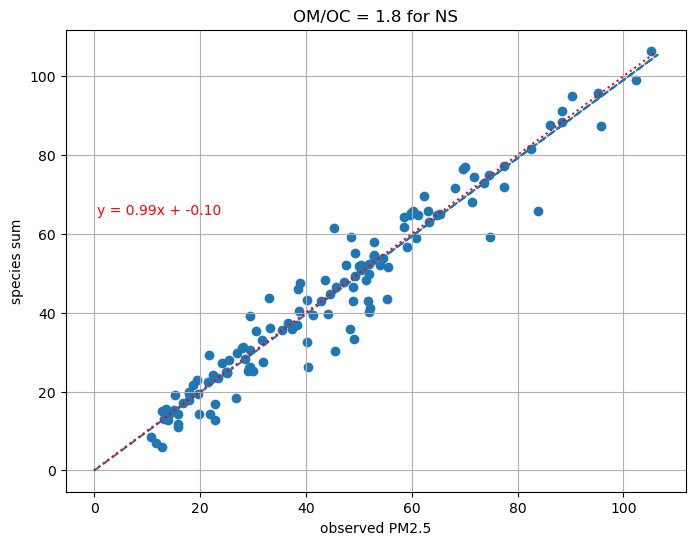

r-squared:  0.9389578238860501


In [41]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesNS['Teflon Mass'], speciesNS['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1.8 for NS')
plt.grid(True)

# Fit a linear regression model
y = NS['species'].values
X = NS['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesNS['species'], slope * speciesNS['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,107)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

print('r-squared: ',model.score(X,y))

In [42]:
speciesGZ['Teflon Mass'].max()

158.372016439596

In [43]:
# import statsmodels.api as sm

# # Assuming you have already fitted your linear regression model and have X, y defined

# # Add a constant term to the independent variable
# X = sm.add_constant(X)

# # Fit the OLS (Ordinary Least Squares) model
# model = sm.OLS(y, X).fit()

# # Get the p-values of the coefficients
# p_values = model.pvalues

# # Print the p-values
# print(p_values)

In [44]:
# for i in range(len(speciesGZ)):
#     speciesGZ.loc[i, 'OM'] = speciesGZ['OC_TOT'][i] * 1.8

speciesGZ['species'] = speciesGZ[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OC_TOT', 'EC_TOT', 'MD']].sum(axis=1)

# drop if there's missing data ( NaN )

GZ = speciesGZ.dropna(subset=['Teflon Mass'])

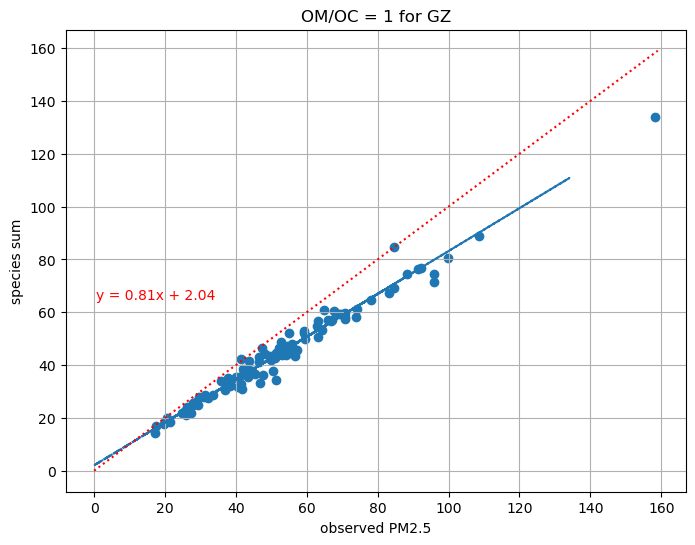

r-squared:  0.9729746952617333


In [45]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesGZ['Teflon Mass'], speciesGZ['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1 for GZ')
plt.grid(True)

# Fit a linear regression model
y = GZ['species'].values
X = GZ['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesGZ['species'], slope * speciesGZ['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,160)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

print('r-squared: ',model.score(X,y))

In [46]:
for i in range(len(speciesGZ)):
    #speciesGZ.loc[i, 'OM'] = speciesGZ['OC_TOT'][i] * 1.8
    speciesGZ.loc[i, 'OM'] = speciesGZ['OC_TOT'][i] * 1.4

speciesGZ['species'] = speciesGZ[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OM', 'EC_TOT', 'MD']].sum(axis=1)

# drop if there's missing data ( NaN )

GZ = speciesGZ.dropna(subset=['Teflon Mass'])

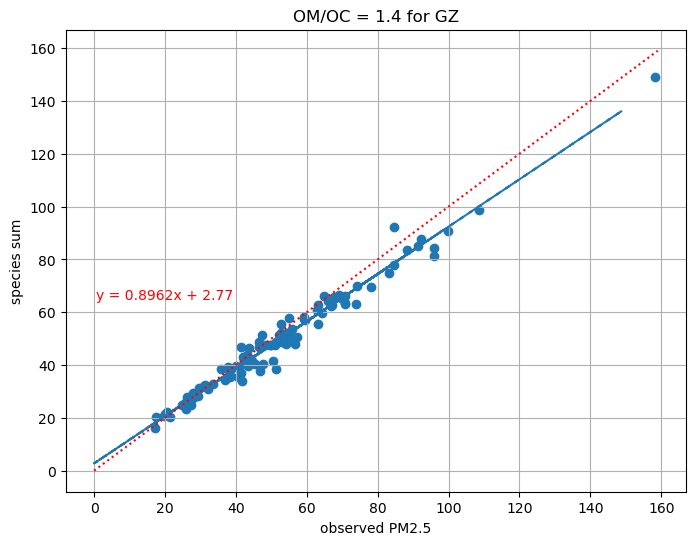

r-squared:  0.974230823943885


In [47]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesGZ['Teflon Mass'], speciesGZ['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1.4 for GZ')
plt.grid(True)

# Fit a linear regression model
y = GZ['species'].values
X = GZ['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesGZ['species'], slope * speciesGZ['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.4f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,160)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

print('r-squared: ',model.score(X,y))

In [48]:
speciesDG['Teflon Mass'].max()

107.407249261851

In [49]:
# for i in range(len(speciesDG)):
#     speciesDG.loc[i, 'OM'] = speciesDG['OC_TOT'][i] * 1.8

speciesDG['species'] = speciesDG[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OC_TOT', 'EC_TOT', 'MD']].sum(axis=1)

# drop if there's missing data ( NaN )

DG = speciesDG.dropna(subset=['Teflon Mass'])

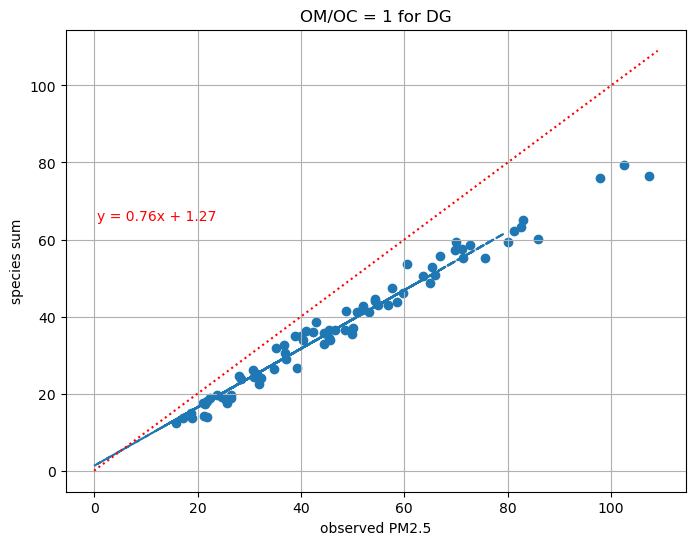

In [50]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesDG['Teflon Mass'], speciesDG['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1 for DG')
plt.grid(True)

# Fit a linear regression model
y = DG['species'].values
X = DG['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesDG['species'], slope * speciesDG['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,110)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

#print('r-squared: ',model.score(X,y))

In [51]:
for i in range(len(speciesDG)):
    #speciesDG.loc[i, 'OM'] = speciesDG['OC_TOT'][i] * 1.9
    speciesDG.loc[i, 'OM'] = speciesDG['OC_TOT'][i] * 1.4

speciesDG['species'] = speciesDG[['NH4+', 'Cl-', 'NO3-', 'SO4=', 'OM', 'EC_TOT', 'MD']].sum(axis=1)

# drop if there's missing data ( NaN )

DG = speciesDG.dropna(subset=['Teflon Mass'])

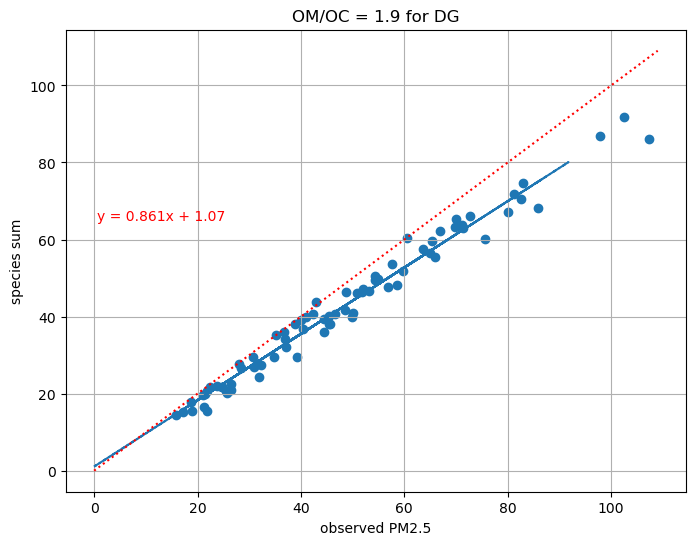

In [52]:
# Plot 'Teflon' on the y-axis and 'species' on the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(speciesDG['Teflon Mass'], speciesDG['species'])
plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1.9 for DG')
plt.grid(True)

# Fit a linear regression model
y = DG['species'].values
X = DG['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(speciesDG['species'], slope * speciesDG['species'] + intercept, linestyle = '--')

# Print the regression equation on the plot
equation = f'y = {slope:.3f}x + {intercept:.2f}'
plt.text(0.5, 65, equation, color='red')

x = range(0,110)
plt.plot(x, x, color= 'red', linestyle = ':')

#plt.grid(True)
plt.show()

#print('r-squared: ',model.score(X,y))

In [53]:
slope

0.8613006740313164

In [54]:
residual = speciesDG['species'] - speciesDG['Teflon Mass']
#speciesDG['Unnamed: 0']
print(len(speciesDG.iloc[:,0]), len(residual))

84 84


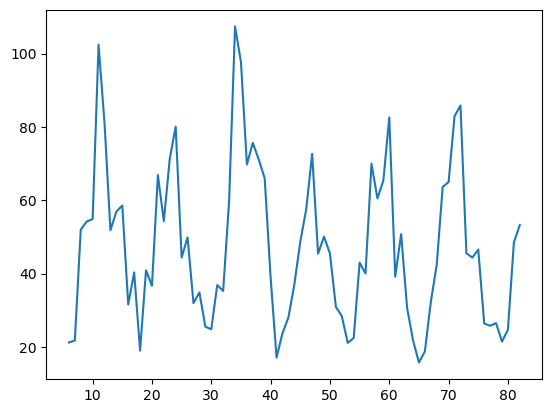

In [55]:
plt.plot(speciesDG['Teflon Mass'])

In [56]:
# reanme the column to 'date'

speciesDG = speciesDG.rename(columns={'Unnamed: 0': 'date'})
# speciesGZ = speciesGZ.rename(columns={'Unnamed: 0': 'date'})
# speciesNH = speciesNH.rename(columns={'Unnamed: 0': 'date'})
# speciesNS = speciesNS.rename(columns={'Unnamed: 0': 'date'})

In [57]:
speciesDG.head()

,date,date,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT,...,Calcium,Manganese,Iron,T Mass,Al,Si,Mn,Fe,MD,species
0,0,2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2008-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2,2008-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,3,2008-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,4,2008-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [58]:
#speciesNS.head()

In [11]:
'''
change the ['date'] columns to datetime form
'''

# speciesDG['date'] = pd.to_datetime(speciesDG['date'], format='%Y%m')
# # speciesGZ['date'] = pd.to_datetime(speciesGZ['date'], format='%Y%m')
# # speciesNH['date'] = pd.to_datetime(speciesNH['date'], format='%Y%m')
# # speciesNS['date'] = pd.to_datetime(speciesNS['date'], format='%Y%m')

"\nchange the ['date'] columns to datetime form\n"

In [ ]:
'''
save
'''


# speciesNH.to_excel('speciesNH.xlsx',index=True)
# speciesGZ.to_excel('speciesGZ.xlsx',index=True)
speciesDG.to_excel('speciesDG.xlsx',index=True)
# speciesNS.to_excel('speciesNS.xlsx',index=True)

In [10]:
speciesNS = pd.read_excel('speciesNS.xlsx')
speciesGZ = pd.read_excel('speciesGZ.xlsx')
speciesNH = pd.read_excel('speciesNH.xlsx')
speciesDG = pd.read_excel('speciesDG.xlsx')

In [6]:
speciesDG.head()

,Unnamed: 0,date,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT,...,Calcium,Manganese,Iron,T Mass,Al,Si,Mn,Fe,MD,species
0,0,2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2008-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2,2008-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,3,2008-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,4,2008-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


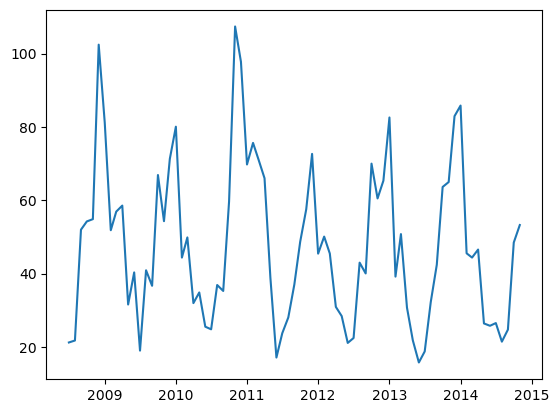

In [62]:
plt.plot(speciesDG['date'], speciesDG['Teflon Mass'])



##### plot linear regrssion and 
#####.  find -? ug/m3 per year (or % change / year)
#####       but PM2.5 change seems to be very seasonal, will linear regression really work?
#####                calculate statistical significance numbers!

.          
let OM/OC = 1.4 to be in constant with existing OM data  
.  


In [8]:

dates = speciesNS['date']
MD = speciesNS['MD']
NH4 = speciesNS['NH4+']
Cl = speciesNS['Cl-']

# # Plot the stacked bars
# plt.bar(dates, MD, label='MD')
# plt.bar(dates, NH4, bottom=MD, label='NH\u2084\u207A')
# plt.bar(dates, Cl, bottom=np.array(MD) + np.array(NH4), label='Cl-')

Text(0, 0.5, 'concentration (ug/m₃)')

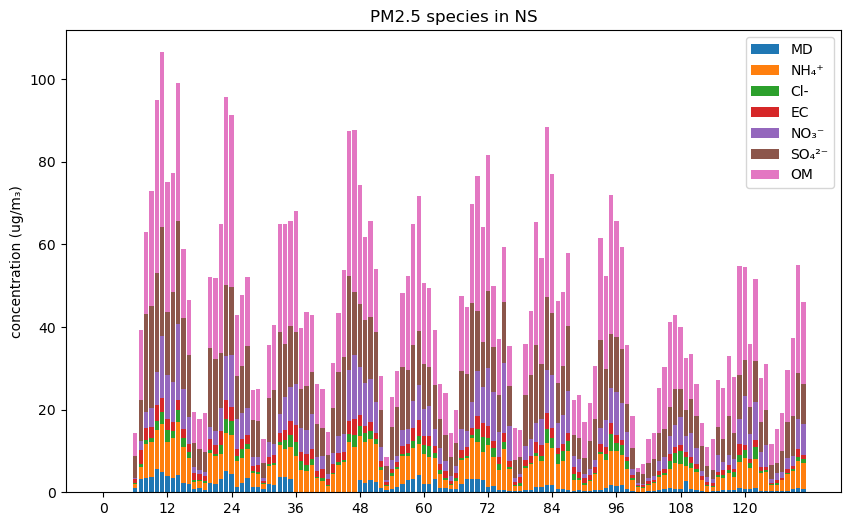

In [64]:
plt.figure(figsize=(10,6))

plt.bar(speciesNS.index, speciesNS['MD'], label='MD')
plt.bar(speciesNS.index, speciesNS['NH4+'], bottom=speciesNS['MD'], label='NH\u2084\u207A')
plt.bar(speciesNS.index, speciesNS['Cl-'],  bottom=speciesNS['MD']+  speciesNS['NH4+'], label='Cl-')
plt.bar(speciesNS.index, speciesNS['EC_TOT'], bottom=speciesNS['MD']+speciesNS['NH4+']+speciesNS['Cl-'], label='EC')
plt.bar(speciesNS.index, speciesNS['NO3-'],  bottom=speciesNS['MD']+ speciesNS['NH4+']+speciesNS['Cl-']+speciesNS['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesNS.index, speciesNS['SO4='],  bottom=speciesNS['MD']+ speciesNS['NH4+']+speciesNS['Cl-']+speciesNS['EC_TOT']+speciesNS['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesNS.index, speciesNS['OM'], bottom=speciesNS['MD']+ speciesNS['NH4+']+speciesNS['Cl-']+ speciesNS['EC_TOT'] + speciesNS['NO3-']+speciesNS['SO4='], label='OM')

plt.xticks(range(0, len(speciesNS.index), 12), speciesNS.index[::12])

plt.title('PM2.5 species in NS')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

In [65]:
speciesNS['date']

0     2007-01-01
1     2007-02-01
2     2007-03-01
3     2007-04-01
4     2007-05-01
         ...    
127   2017-08-01
128   2017-09-01
129   2017-10-01
130   2017-11-01
131   2017-12-01
Name: date, Length: 132, dtype: datetime64[ns]

In [13]:
#plt.bar(speciesNS['date'], speciesNS['Teflon Mass'])

Text(0, 0.5, 'concentration (ug/m₃)')

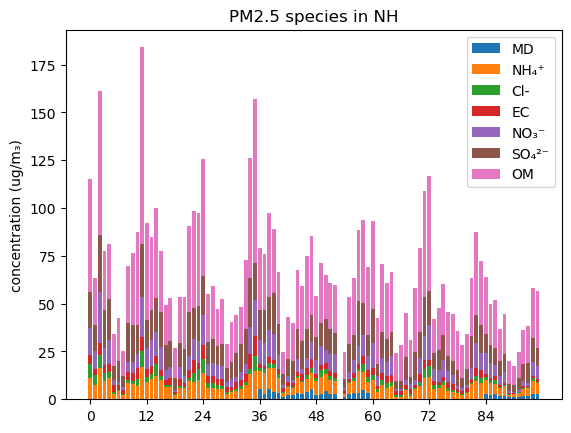

In [67]:
plt.bar(speciesNH.index, speciesNH['MD'], label='MD')
plt.bar(speciesNH.index, speciesNH['NH4+'], bottom=speciesNH['MD'], label='NH\u2084\u207A')
plt.bar(speciesNH.index, speciesNH['Cl-'],  bottom=speciesNH['MD']+  speciesNH['NH4+'], label='Cl-')
plt.bar(speciesNH.index, speciesNH['EC_TOT'], bottom=speciesNH['MD']+speciesNH['NH4+']+speciesNH['Cl-'], label='EC')
plt.bar(speciesNH.index, speciesNH['NO3-'],  bottom=speciesNH['MD']+ speciesNH['NH4+']+speciesNH['Cl-']+speciesNH['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesNH.index, speciesNH['SO4='],  bottom=speciesNH['MD']+ speciesNH['NH4+']+speciesNH['Cl-']+speciesNH['EC_TOT']+speciesNH['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesNH.index, speciesNH['OM'], bottom=speciesNH['MD']+ speciesNH['NH4+']+speciesNH['Cl-']+ speciesNH['EC_TOT'] + speciesNH['NO3-']+speciesNH['SO4='], label='OM')

plt.xticks(range(0, len(speciesNH['date']), 12), speciesNH.index[::12])

plt.title('PM2.5 species in NH')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

Text(0, 0.5, 'concentration (ug/m₃)')

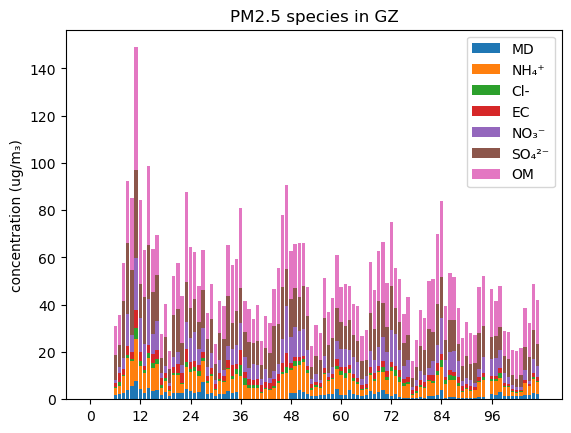

In [68]:
plt.bar(speciesGZ.index, speciesGZ['MD'], label='MD')
plt.bar(speciesGZ.index, speciesGZ['NH4+'], bottom=speciesGZ['MD'], label='NH\u2084\u207A')
plt.bar(speciesGZ.index, speciesGZ['Cl-'], bottom=speciesGZ['MD']+speciesGZ['NH4+'], label='Cl-')
plt.bar(speciesGZ.index, speciesGZ['EC_TOT'], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-'], label='EC')
plt.bar(speciesGZ.index, speciesGZ['NO3-'], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-']+speciesGZ['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesGZ.index, speciesGZ['SO4='], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-']+speciesGZ['EC_TOT']+speciesGZ['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesGZ.index, speciesGZ['OM'], bottom=speciesGZ['MD']+speciesGZ['NH4+']+speciesGZ['Cl-']+speciesGZ['EC_TOT']+speciesGZ['NO3-']+speciesGZ['SO4='], label='OM')

plt.xticks(range(0, len(speciesGZ.index), 12), speciesGZ.index[::12])

plt.title('PM2.5 species in GZ')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

Text(0, 0.5, 'concentration (ug/m₃)')

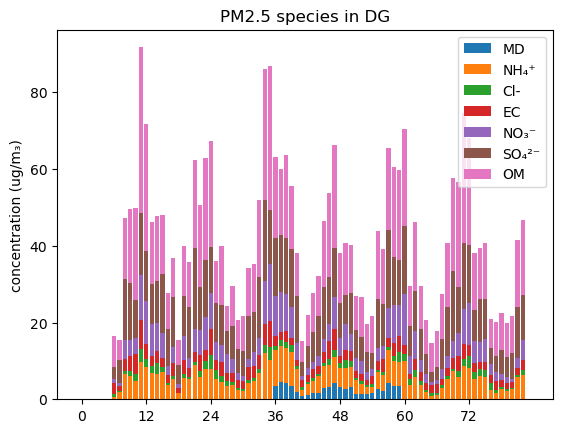

In [69]:
plt.bar(speciesDG.index, speciesDG['MD'], label='MD')
plt.bar(speciesDG.index, speciesDG['NH4+'], bottom=speciesDG['MD'], label='NH\u2084\u207A')
plt.bar(speciesDG.index, speciesDG['Cl-'],  bottom=speciesDG['MD']+  speciesDG['NH4+'], label='Cl-')
plt.bar(speciesDG.index, speciesDG['EC_TOT'], bottom=speciesDG['MD']+speciesDG['NH4+']+speciesDG['Cl-'], label='EC')
plt.bar(speciesDG.index, speciesDG['NO3-'],  bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+speciesDG['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesDG.index, speciesDG['SO4='],  bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+speciesDG['EC_TOT']+speciesDG['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesDG.index, speciesDG['OM'], bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+ speciesDG['EC_TOT'] + speciesDG['NO3-']+speciesDG['SO4='], label='OM')

plt.xticks(range(0, len(speciesDG.index), 12), speciesDG.index[::12])

plt.title('PM2.5 species in DG')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

In [14]:
DG = speciesDG.dropna(subset=['Teflon Mass'])
GZ = speciesGZ.dropna(subset=['Teflon Mass'])

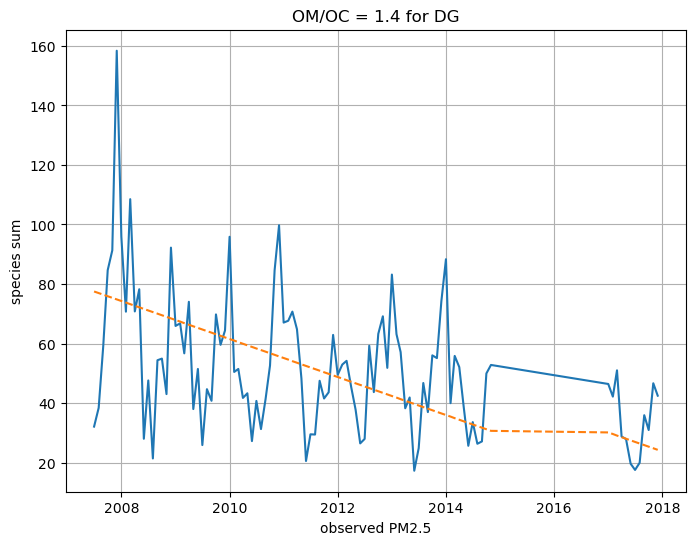

y = -0.532x + 77.48
r-squared:  0.17259604634407621


In [17]:
plt.figure(figsize=(8, 6))

# Plot the regression line
plt.plot(GZ['date'],GZ['Teflon Mass'])
plt.plot(GZ['date'], lin, linestyle = '--')

plt.xlabel('observed PM2.5')
plt.ylabel('species sum')
plt.title('OM/OC = 1.4 for DG')
plt.grid(True)


# Fit a linear regression model
y = range(len(GZ))
X = GZ['Teflon Mass'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# reslt using linear regression
lin = []
for i in y:
    lin.append(slope*i+intercept)



# # Print the regression equation on the plot
equation = f'y = {slope:.3f}x + {intercept:.2f}'
# plt.text(0.5, 65, equation, color='red')

plt.show()
print(equation)
print('r-squared: ',model.score(X,y))

In [ ]:
len(lin)

In [ ]:
z=[[1],[2],[3]]
type(z)

Text(0, 0.5, 'concentration (ug/m₃)')

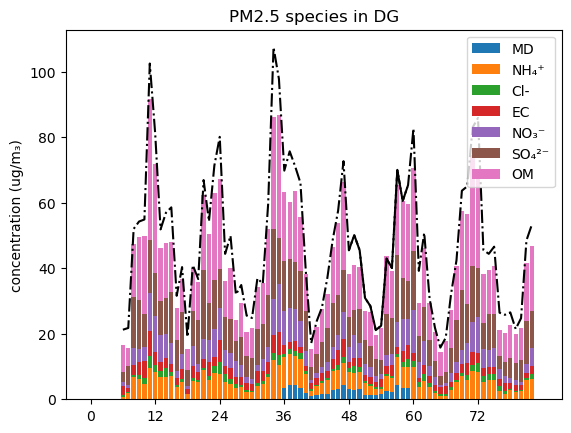

In [74]:
plt.bar(speciesDG.index, speciesDG['MD'], label='MD')
plt.bar(speciesDG.index, speciesDG['NH4+'], bottom=speciesDG['MD'], label='NH\u2084\u207A')
plt.bar(speciesDG.index, speciesDG['Cl-'],  bottom=speciesDG['MD']+  speciesDG['NH4+'], label='Cl-')
plt.bar(speciesDG.index, speciesDG['EC_TOT'], bottom=speciesDG['MD']+speciesDG['NH4+']+speciesDG['Cl-'], label='EC')
plt.bar(speciesDG.index, speciesDG['NO3-'],  bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+speciesDG['EC_TOT'], label='NO\u2083\u207B')
plt.bar(speciesDG.index, speciesDG['SO4='],  bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+speciesDG['EC_TOT']+speciesDG['NO3-'], label='SO\u2084\u00B2\u207B')
plt.bar(speciesDG.index, speciesDG['OM'], bottom=speciesDG['MD']+ speciesDG['NH4+']+speciesDG['Cl-']+ speciesDG['EC_TOT'] + speciesDG['NO3-']+speciesDG['SO4='], label='OM')

plt.xticks(range(0, len(speciesDG.index), 12), speciesDG.index[::12])

plt.plot(speciesDG['Teflon Mass'], linestyle='dashdot',color='black')
plt.plot(speciesDG['T Mass'],linestyle='dashdot',color='black')

plt.title('PM2.5 species in DG')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

In [75]:
unaccountedGZ = []

for i in range(len(speciesGZ)):
    unaccountedGZ.append((speciesGZ['Teflon Mass'][i]-speciesGZ['species'][i])/speciesGZ['Teflon Mass'][i])

In [76]:
unaccountedNH = []

for i in range(len(speciesNH)):
    unaccountedNH.append((speciesNH['Teflon Mass'][i]-speciesNH['species'][i])/speciesNH['Teflon Mass'][i])

unaccountedNS = []

for i in range(len(speciesNS)):
    unaccountedNS.append((speciesNS['Teflon Mass'][i]-speciesNS['species'][i])/speciesNS['Teflon Mass'][i])

unaccountedDG = []

for i in range(len(speciesDG)):
    unaccountedDG.append((speciesDG['Teflon Mass'][i]-speciesDG['species'][i])/speciesDG['Teflon Mass'][i])

In [77]:
print(np.nanmax(unaccountedGZ), max(unaccountedNH), np.nanmax(unaccountedNS), np.nanmax(unaccountedDG))

0.2539118704946639 0.25386914856263576 0.5371301652017013 0.2853056568597667


In [78]:
print(np.nanmin(unaccountedGZ), min(unaccountedNH), np.nanmin(unaccountedNS), np.nanmin(unaccountedDG))

-0.1534893671991418 -0.24128781368004365 -0.3566453246090887 -0.017414152579106404


In [79]:
print(np.nanmean(unaccountedGZ), np.nanmean(unaccountedNH), np.nanmean(unaccountedNS), np.nanmean(unaccountedDG))

0.03823125053044554 -0.07018307577967263 0.015665268086021276 0.11445648553980943


In [80]:
for i in range(len(speciesNS)):
    if pd.isnull(speciesNS['Teflon Mass'][i]):
        speciesNS.loc[i, 'Teflon Mass'] = speciesNS['PM2.5'][i] 

In [81]:
for i in range(len(speciesGZ)):
    if pd.isnull(speciesGZ['Teflon Mass'][i]):
        speciesGZ.loc[i, 'Teflon Mass'] = speciesGZ['PM2.5'][i] 

In [82]:
unNH= []
for i in range(len(speciesNH)):
    unNH.append((speciesNH['species'][i])/speciesNH['Teflon Mass'][i])

In [83]:
import numpy as np
from tabulate import tabulate



# Calculate max, min, and mean values while omitting NaN
data = [
    ["Max", np.nanmax(unaccountedGZ), max(unaccountedNH), np.nanmax(unaccountedNS), np.nanmax(unaccountedDG)],
    ["Min", np.nanmin(unaccountedGZ), min(unaccountedNH), np.nanmin(unaccountedNS), np.nanmin(unaccountedDG)],
    ["Mean", np.nanmean(unaccountedGZ), np.nanmean(unaccountedNH), np.nanmean(unaccountedNS), np.nanmean(unaccountedDG)]
]

# Print the results in a table
headers = ["Stat", "unaccountedGZ", "unaccountedNH", "unaccountedNS", "unaccountedDG"]
print(tabulate(data, headers=headers, tablefmt="grid"))

+--------+-----------------+-----------------+-----------------+-----------------+
| Stat   |   unaccountedGZ |   unaccountedNH |   unaccountedNS |   unaccountedDG |
+========+=================+=================+=================+=================+
| Max    |       0.253912  |       0.253869  |       0.53713   |       0.285306  |
+--------+-----------------+-----------------+-----------------+-----------------+
| Min    |      -0.153489  |      -0.241288  |      -0.356645  |      -0.0174142 |
+--------+-----------------+-----------------+-----------------+-----------------+
| Mean   |       0.0382313 |      -0.0701831 |       0.0156653 |       0.114456  |
+--------+-----------------+-----------------+-----------------+-----------------+


In [84]:
max_index = np.nanargmax(unaccountedNS)
max_index

100

In [85]:
#speciesNS.iloc[100]

In [86]:
min(unNH)

0.7461308514373642

In [87]:
#speciesDG

In [88]:
str(speciesDG['date'][5])[5:8]

'06-'

### select summer  
June, July, August

In [19]:
rows = []

for i in range(len(speciesDG)):
    if str(speciesDG['date'][i])[5:7] == '06' :#or '07' or '08':
        #print(i)
        rows.append(speciesDG.iloc[i])
    if str(speciesDG['date'][i])[5:7] == '07' :
        rows.append(speciesDG.iloc[i])
    if str(speciesDG['date'][i])[5:7] == '08' :
        rows.append(speciesDG.iloc[i])

jjaDG = pd.DataFrame(rows)  
    

In [20]:
rows = []

for i in range(len(speciesGZ)):
    if str(speciesGZ['date'][i])[5:7] == '06' :#or '07' or '08':
        #print(i)
        rows.append(speciesGZ.iloc[i])
    if str(speciesGZ['date'][i])[5:7] == '07' :
        rows.append(speciesGZ.iloc[i])
    if str(speciesGZ['date'][i])[5:7] == '08' :
        rows.append(speciesGZ.iloc[i])

jjaGZ = pd.DataFrame(rows)  

In [21]:
rows = []

for i in range(len(speciesNH)):
    if str(speciesNH['date'][i])[5:7] == '06' :#or '07' or '08':
        #print(i)
        rows.append(speciesNH.iloc[i])
    if str(speciesNH['date'][i])[5:7] == '07' :
        rows.append(speciesNH.iloc[i])
    if str(speciesNH['date'][i])[5:7] == '08' :
        rows.append(speciesNH.iloc[i])

jjaNH = pd.DataFrame(rows)  

In [22]:
#rows

In [23]:
rows = []

for i in range(len(speciesNS)):
    if str(speciesNS['date'][i])[5:7] == '06' :#or '07' or '08':
        #print(i)
        rows.append(speciesNS.iloc[i])
    if str(speciesNS['date'][i])[5:7] == '07' :
        rows.append(speciesNS.iloc[i])
    if str(speciesNS['date'][i])[5:7] == '08' :
        rows.append(speciesNS.iloc[i])

jjaNS = pd.DataFrame(rows)  

In [24]:
jjaNS.head()

,Unnamed: 0,date,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT,...,Ca,OM,Al,Si,Mn,Fe,PM2.5,S/SO4,MD,species
5,5,2007-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
6,6,2007-07-01,19.752231,1.019431,0.069693,0.184391,0.410164,5.143569,3.158220,1.012952,...,NaN,5.684796,NaN,NaN,NaN,NaN,NaN,NaN,0.938041,14.393345
7,7,2007-08-01,29.368743,2.864670,0.348800,0.767722,2.136580,9.962224,9.381158,3.255864,...,NaN,16.886084,NaN,NaN,NaN,NaN,NaN,NaN,3.313031,39.186175
17,17,2008-06-01,19.710198,1.767531,0.279694,0.457109,1.570450,5.753661,4.114474,1.628738,...,NaN,7.406054,NaN,NaN,NaN,NaN,NaN,NaN,0.780703,19.364245
18,18,2008-07-01,17.915419,1.705838,0.255672,0.325493,1.070867,4.893618,4.097923,1.443789,...,NaN,7.376261,NaN,NaN,NaN,NaN,NaN,NaN,0.954751,17.770618


In [25]:
jjaDG=jjaDG.fillna(0)
jjaGZ=jjaGZ.fillna(0)
jjaNH=jjaNH.fillna(0)
jjaNS=jjaNS.fillna(0)

jjaGZ = jjaGZ.iloc[1:]
jjaNS = jjaNS.iloc[1:]
jjaDG = jjaDG.iloc[5:]

In [26]:
mask = ~np.isnan(jjaDG['Teflon Mass'])
#mask

DG JJA
-0.43027237871934876 *x +  3536.33488921495
0.3407941480648041


Text(0, 0.5, 'concentration (ug/m3)')

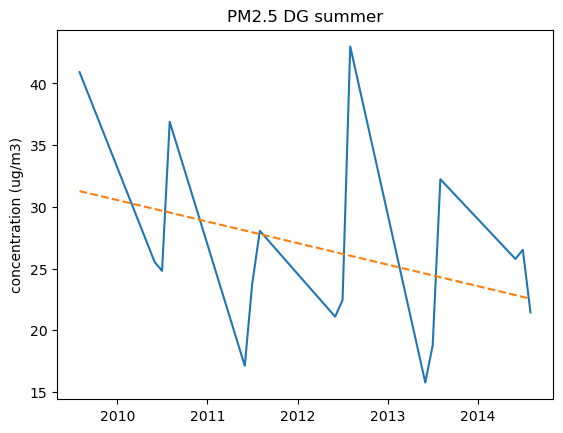

In [180]:
# Fit a linear regression model
from scipy import stats

y = range(len(jjaDG))
yy = jjaDG['date'].map(pd.Timestamp.toordinal)
slopedg, intercept, r_value, p_valuedg, std_err = stats.linregress(y,jjaDG['Teflon Mass'])
slope, intercept, r_value, p_value, std_err = stats.linregress(yy,jjaDG['Teflon Mass'])


# reslt using linear regression
lin = []
for i in yy:
    lin.append(slope*i+intercept)


plt.show()
print('DG JJA')
print(slopedg,'*x + ',intercept)
print(p_valuedg)

plt.plot(jjaDG['date'], jjaDG['Teflon Mass'])
plt.plot(jjaDG['date'], lin, linestyle= '--')
plt.title('PM2.5 DG summer')
plt.ylabel('concentration (ug/m3)')

In [182]:
jjaNH

,Unnamed: 0,date,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT,...,Manganese,Iron,Al,Si,Mn,Fe,PM2.5,Na,MD,species
5,5,2008-06-01,33.757469,2.872191,0.529176,1.148237,2.392980,7.543302,7.921823,3.610962,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.203501
6,6,2008-07-01,43.759903,4.145138,0.717666,0.758632,1.971329,10.838670,10.755768,2.407728,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.708608
7,7,2008-08-01,26.266032,2.289173,0.384282,0.723113,1.294876,6.165351,6.070011,1.913133,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.132670
17,17,2009-06-01,52.794046,6.337717,0.810515,1.276796,5.690306,13.930736,10.728184,3.350395,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.115135
18,18,2009-07-01,27.467360,2.124264,0.291606,0.550228,1.437618,6.285519,7.427783,0.932071,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.928044
19,19,2009-08-01,53.148099,5.927219,0.515976,1.260663,6.148934,12.429925,11.516006,3.439345,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.389699
29,29,2010-06-01,29.192785,2.758488,0.381056,0.940856,2.630758,7.196089,6.177347,2.581454,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.080073
30,30,2010-07-01,37.079785,3.768613,0.428005,0.513646,4.100776,9.079367,9.952962,2.247767,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.611388
31,31,2010-08-01,38.245059,4.502689,0.531571,0.855324,2.617198,12.534294,9.541999,3.550432,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.098135
41,41,2011-06-01,21.184858,1.994176,0.342434,0.636308,1.506324,5.668102,5.437215,1.937485,...,0.033451,0.262171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.382358,24.542905


NH JJA
-0.7134918091900997 *x +  4141.370135846297
0.3407941480648041


Text(0, 0.5, 'concentration (ug/m3)')

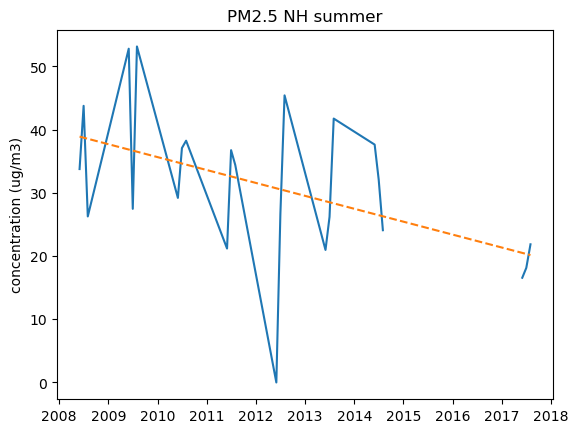

In [184]:
y = range(len(jjaNH))
yy = jjaNH['date'].map(pd.Timestamp.toordinal)
slopenh, intercept, r_value, p_valuenh, std_err = stats.linregress(y,jjaNH['Teflon Mass'])
slope, intercept, r_value, p_value, std_err = stats.linregress(yy,jjaNH['Teflon Mass'])


# reslt using linear regression
lin = []
for i in yy:
    lin.append(slope*i+intercept)


plt.show()
print('NH JJA')
print(slopenh,'*x + ',intercept)
print(p_valuedg)

plt.plot(jjaNH['date'][:-3], jjaNH['Teflon Mass'][:-3],color='#1f77b4')
plt.plot(jjaNH['date'][-3:], jjaNH['Teflon Mass'][-3:],color='#1f77b4')
plt.plot(jjaNH['date'], lin, linestyle= '--',color='#ff7f0e')
plt.title('PM2.5 NH summer')
plt.ylabel('concentration (ug/m3)')

In [100]:
jjaNH.head()

,Unnamed: 0,date,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT,...,Manganese,Iron,Al,Si,Mn,Fe,PM2.5,Na,MD,species
5,5,2008-06-01,33.757469,2.872191,0.529176,1.148237,2.392980,7.543302,7.921823,3.610962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.203501
6,6,2008-07-01,43.759903,4.145138,0.717666,0.758632,1.971329,10.838670,10.755768,2.407728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.708608
7,7,2008-08-01,26.266032,2.289173,0.384282,0.723113,1.294876,6.165351,6.070011,1.913133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.132670
17,17,2009-06-01,52.794046,6.337717,0.810515,1.276796,5.690306,13.930736,10.728184,3.350395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.115135
18,18,2009-07-01,27.467360,2.124264,0.291606,0.550228,1.437618,6.285519,7.427783,0.932071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.928044


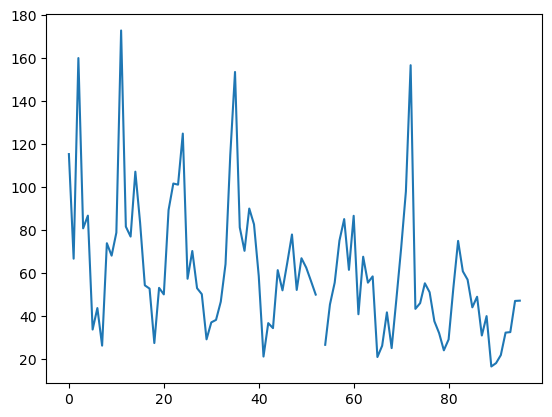

In [101]:
plt.plot(speciesNH['Teflon Mass'])

NS JJA
-0.0014102201465593387 *x +  1056.3236444811077
0.20184940249285588


Text(0.5, 1.0, 'PM2.5 NS summer')

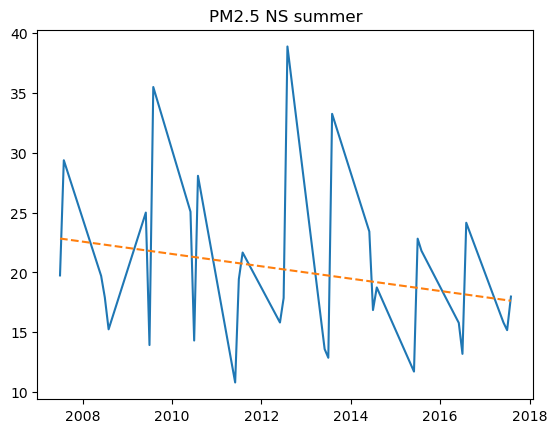

In [30]:
from scipy import stats

y = jjaNS['date'].map(pd.Timestamp.toordinal)
slopens, intercept, r_value, p_valuens, std_err = stats.linregress(y,jjaNS['Teflon Mass'])


# reslt using linear regression
lin = []
for i in y:
    lin.append(slopens*i+intercept)


plt.show()
print('NS JJA')
print(slopens,'*x + ',intercept)
print(p_valuens)

plt.plot(jjaNS['date'], jjaNS['Teflon Mass'])
plt.plot(jjaNS['date'], lin, linestyle= '--')
plt.title('PM2.5 NS summer')

In [31]:
# y = range(len(jjaDG))
# slopens, intercept, r_value, p_valuens, std_err = stats.linregress(y,jjaDG['Teflon Mass'])


# # reslt using linear regression
# lin = []
# for i in y:
#     lin.append(slopens*i+intercept)


# plt.show()
# print('DG JJA')
# print(slopens,'*x + ',intercept)
# print(p_valuens)

# plt.plot(jjaDG['date'], jjaDG['Teflon Mass'])
# plt.plot(jjaDG['date'], lin, linestyle= '--')
# plt.title('PM2.5 DG summer')

GZ JJA
-2.5201893082495186 *x +  3074.356606890271
0.08798549450400477


Text(0, 0.5, 'concentration (ug/m3)')

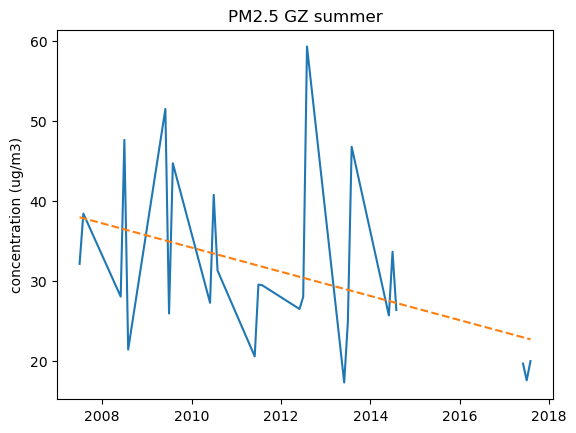

In [179]:
y = range(len(jjaGZ))
yy = jjaGZ['date'].map(pd.Timestamp.toordinal)
slopens, intercept, r_value, p_valuens, std_err = stats.linregress(y,jjaGZ['Teflon Mass'])
slope, intercept, r_value, p_value, std_err = stats.linregress(yy,jjaGZ['Teflon Mass'])


# reslt using linear regression
lin = []
for i in yy:
    lin.append(slope*i+intercept)


plt.show()
print('GZ JJA')
print(slopegz,'*x + ',intercept)
print(p_valuens)

plt.plot(jjaGZ['date'][:-3], jjaGZ['Teflon Mass'][:-3],color='#1f77b4')
plt.plot(jjaGZ['date'][-3:], jjaGZ['Teflon Mass'][-3:],color='#1f77b4')
plt.plot(jjaGZ['date'], lin, linestyle = '--',color='#ff7f0e')
plt.title('PM2.5 GZ summer')
plt.ylabel('concentration (ug/m3)')

In [104]:
from scipy import stats

y = range(len(jjaNH))
slopenh, intercept, r_value, p_valuenh, std_err = stats.linregress(y,jjaNH['Teflon Mass'])


# reslt using linear regression
lin = []
for i in y:
    lin.append(slopenh*i+intercept)


plt.show()
print('NH JJA')
print(slopenh,'*x + ',intercept)
print(p_valuenh)

NH JJA
-0.7134918091900997 *x +  39.26258881553366
0.04314759791791205


####  For Decemner, Janauary, Feburary

In [32]:
rows = []

for i in range(len(speciesGZ)):
    if str(speciesGZ['date'][i])[5:7] == '12' :#or '07' or '08':
        #print(i)
        rows.append(speciesGZ.iloc[i])
    if str(speciesGZ['date'][i])[5:7] == '01' :
        rows.append(speciesGZ.iloc[i])
    if str(speciesGZ['date'][i])[5:7] == '02' :
        rows.append(speciesGZ.iloc[i])

djfGZ = pd.DataFrame(rows) 

In [33]:
rows = []

for i in range(len(speciesDG)):
    if str(speciesDG['date'][i])[5:7] == '12' :#or '07' or '08':
        #print(i)
        rows.append(speciesDG.iloc[i])
    if str(speciesDG['date'][i])[5:7] == '01' :
        rows.append(speciesDG.iloc[i])
    if str(speciesDG['date'][i])[5:7] == '02' :
        rows.append(speciesDG.iloc[i])

djfDG = pd.DataFrame(rows) 

In [34]:
rows = []

for i in range(len(speciesNH)):
    if str(speciesNH['date'][i])[5:7] == '12' :#or '07' or '08':
        #print(i)
        rows.append(speciesNH.iloc[i])
    if str(speciesNH['date'][i])[5:7] == '01' :
        rows.append(speciesNH.iloc[i])
    if str(speciesNH['date'][i])[5:7] == '02' :
        rows.append(speciesNH.iloc[i])

djfNH = pd.DataFrame(rows) 

In [35]:
rows = []

for i in range(len(speciesNS)):
    if str(speciesNS['date'][i])[5:7] == '12' :#or '07' or '08':
        #print(i)
        rows.append(speciesNS.iloc[i])
    if str(speciesNS['date'][i])[5:7] == '01' :
        rows.append(speciesNS.iloc[i])
    if str(speciesNS['date'][i])[5:7] == '02' :
        rows.append(speciesNS.iloc[i])

djfNS = pd.DataFrame(rows) 

In [36]:
djfGZ = djfGZ.fillna(0)
djfDG = djfDG.fillna(0)
djfNH = djfNH.fillna(0)
djfNS = djfNS.fillna(0)

djfGZ = djfGZ.iloc[2:]
djfDG = djfDG.iloc[2:]
djfNH = djfNH.iloc[2:]
djfNS = djfNS.iloc[2:]

In [178]:
#djfGZ

PM2.5 GZ DJF
-2.5201893082495186 *x +  12227.534400495711
0.023817856143408013


Text(0, 0.5, 'concentration (ug/m3)')

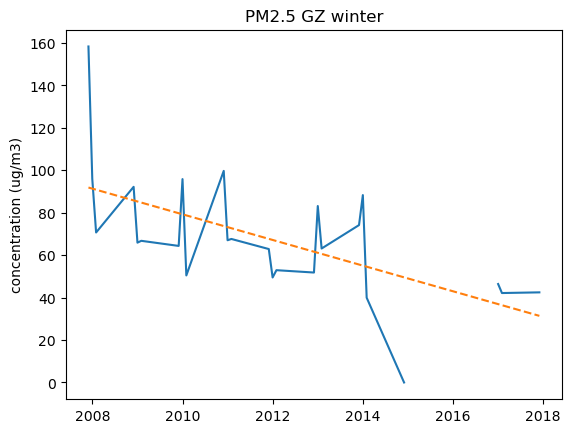

In [177]:
from scipy import stats
y = range(len(djfGZ))
yy = djfGZ['date'].map(pd.Timestamp.toordinal)
slopegz, intercept, r_value, p_valuegz, std_err = stats.linregress(y,djfGZ['Teflon Mass'])
slope, intercept, r_value, p_value, std_err = stats.linregress(yy,djfGZ['Teflon Mass'])

# reslt using linear regression
lin = []
for i in yy:
    lin.append(slope*i+intercept)


# # Extend the regression line to match the dates
# # plt.plot(djfNH['date'], lin, linestyle='--', color='red', label='Regression Line')
plt.show()
print('PM2.5 GZ DJF')
print(slopegz,'*x + ',intercept)
print(p_valuenh)

plt.plot(djfGZ['date'][:-3], djfGZ['Teflon Mass'][:-3],color='#1f77b4')
plt.plot(djfGZ['date'][-3:], djfGZ['Teflon Mass'][-3:],color='#1f77b4')
plt.plot(djfGZ['date'], lin, linestyle = '--',color='#ff7f0e')
plt.title('PM2.5 GZ winter')
plt.ylabel('concentration (ug/m3)')

In [39]:
from scipy import stats
# djfNH['Teflon Mass']
y = djfDG['date'].map(pd.Timestamp.toordinal)
slopedg, intercept, r_value, p_valuedg, std_err = stats.linregress(y,djfDG['Teflon Mass'])
slopedg, intercept, r_value, p_valuedg, std_err = stats.linregress(yy,djfDG['Teflon Mass'])


# reslt using linear regression
lin = []
for i in y:
    lin.append(slopedg*i+intercept)


plt.show()
print('DG DJF')
print(slopedg,'*x + ',intercept)
print(p_valuedg)

DG DJF
-0.014742441376504045 *x +  10892.12739385521
0.07758381065420777


In [126]:
#djfNH

PM2.5 NH DJF
-2.825222173528915 *x +  13218.73664383971
0.023817856143408013


Text(0, 0.5, 'concentration (ug/m3)')

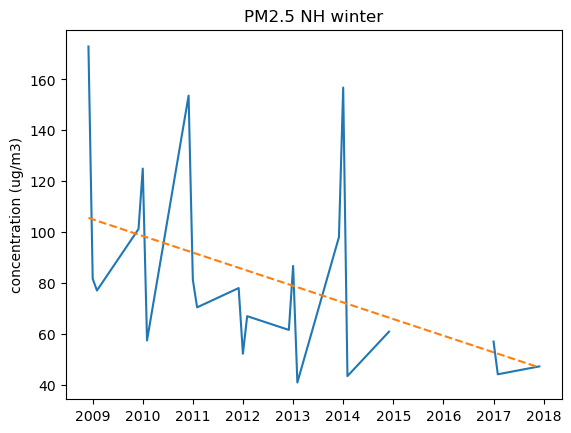

In [174]:
from scipy import stats
y = range(len(djfNH))
yy = djfNH['date'].map(pd.Timestamp.toordinal)
#print(y)
#print(len(djfNH['Teflon Mass']))
slopenh, intercept, r_value, p_valuenh, std_err = linregress(y,djfNH['Teflon Mass'])
slope, intercept, r_value, p_value, std_err = linregress(yy,djfNH['Teflon Mass'])


# reslt using linear regression
lin = []
for i in yy:
    lin.append(slope*i+intercept)

#yy = np.linspace(2009,2018,22)

# Plot the Teflon Mass data
#plt.figure(figsize=(10, 6))
# # plt.plot(djfNH['date'], djfNH['Teflon Mass'], label='Teflon Mass', color='blue')

# # Extend the regression line to match the dates
# # plt.plot(djfNH['date'], lin, linestyle='--', color='red', label='Regression Line')
# plt.show()
print('PM2.5 NH DJF')
print(slopenh,'*x + ',intercept)
print(p_valuenh)

plt.plot(djfNH['date'][:-3], djfNH['Teflon Mass'][:-3],color='#1f77b4')
plt.plot(djfNH['date'][-3:], djfNH['Teflon Mass'][-3:],color='#1f77b4')
plt.plot(djfNH['date'], lin, linestyle = '--',color='#ff7f0e')
plt.title('PM2.5 NH winter')
plt.ylabel('concentration (ug/m3)')

In [49]:
#plt.plot(djfNH['date'], djfNH['Teflon Mass'])

PM2.5 DG DJF
-1.9608561596798686 *x +  10892.12739385521
0.05210144935734366


Text(0.5, 1.0, 'PM2.5 DG winter')

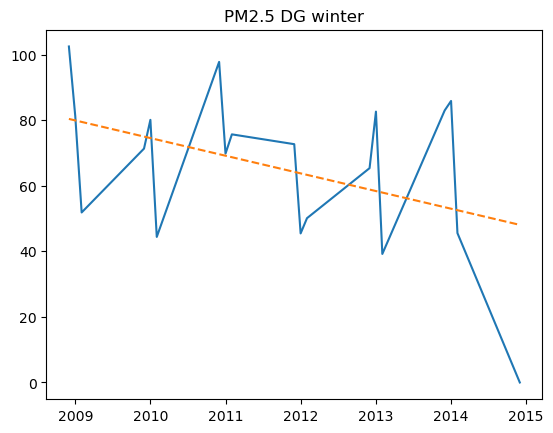

In [166]:
y = range(len(djfDG))
yy = djfDG['date'].map(pd.Timestamp.toordinal)
slopedg, intercept, r_value, p_valuedg, std_err = stats.linregress(y,djfDG['Teflon Mass'])
slope, intercept, r_value, p_value, std_err = stats.linregress(yy,djfDG['Teflon Mass'])


# reslt using linear regression
lin = []
for i in yy:
    lin.append(slope*i+intercept)


plt.show()
print('PM2.5 DG DJF')
print(slopedg,'*x + ',intercept)
print(p_valuedg)

# plt.plot(djfNS['date'], djfNS['Teflon Mass'])
plt.plot(djfDG['date'], djfDG['Teflon Mass'])
plt.plot(djfDG['date'], lin, linestyle = '--')
plt.title('PM2.5 DG winter')

In [364]:
len(djfDG['Teflon Mass'])
# len(djfNH['date'])

19

NS DJF
-1.0683059603187663 *x +  6146.522269116765
0.0022883269107042254
31


Text(0, 0.5, 'concentration (ug/m3)')

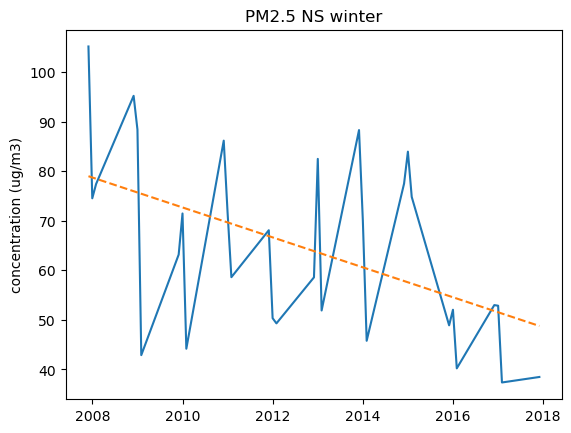

In [175]:
from scipy import stats

y= range(len(djfNS))
yy = djfNS['date'].map(pd.Timestamp.toordinal)
slopens, intercept, r_value, p_valuens, std_err = stats.linregress(y,djfNS['Teflon Mass'])
slope, intercept, r_value, p_value, std_err = stats.linregress(yy,djfNS['Teflon Mass'])


# reslt using linear regression
lin = []
for i in yy:
    lin.append(slope*i+intercept)

plt.show()
print('NS DJF')
print(slopens,'*x + ',intercept)
print(p_valuens)

# plt.plot(djfNS['date'], djfNS['Teflon Mass'])
plt.plot(djfNS['date'], djfNS['Teflon Mass'])
plt.plot(djfNS['date'], lin, linestyle = '--')
plt.title('PM2.5 NS winter')
print(len(djfNS))
#print(y)
plt.ylabel('concentration (ug/m3)')

In [51]:
# # Calculate max, min, and mean values while omitting NaN
# data = [
#     ["JJA", -0.712, -0.430, -0.704, -0.148],
#     ["DJF", -2.759, -0.904, -2.825, -1.068],
    
# ]

# # Print the results in a table
# headers = ["linRegress slope", "GZ", "DG", "NH", "NS"]
# print(tabulate(data, headers=headers, tablefmt="grid"))

In [52]:
jjaslopePM=[slopegz, slopedg,slopenh,slopens]
jjapPM = [p_valuegz, p_valuedg, p_valuenh, p_valuens]
# jjaslopePM = []
# jjapPM=[]
jjaslopePM

[-0.01655589140691399,
 -0.014742441376504045,
 -0.017880581296982986,
 -0.0014102201465593387]

calculate the average for JJA and DJF  
calcualte the annual average, then calculate linear regression

In [117]:
jjaNH.to_excel('jjaNH.xlsx',index=True)
jjaGZ.to_excel('jjaGZ.xlsx',index=True)
jjaDG.to_excel('jjaDG.xlsx',index=True)
jjaNS.to_excel('jjaNS.xlsx',index=True)

djfGZ.to_excel('djfGZ.xlsx',index=True)
djfNH.to_excel('djfNH.xlsx',index=True)
djfNS.to_excel('djfNS.xlsx',index=True)
djfDG.to_excel('djfDG.xlsx',index=True)

In [118]:
jjaGZ.columns

Index(['Unnamed: 0', 'date', 'Teflon Mass', 'NH4+', 'K+', 'Cl-', 'NO3-',
       'SO4=', 'OC_TOT', 'EC_TOT', 'Aluminum', 'Silicon', 'Sulfur', 'Chlorine',
       'Potassium', 'Calcium', 'Manganese', 'Iron', 'K', 'Ca', 'OM', 'T Mass',
       'Al', 'Si', 'Mn', 'Fe', 'PM2.5', 'S/SO4', 'Na', 'Trace_Element', 'MD',
       'species'],
      dtype='object')

NS DJF
-0.0009326995804705923 *x +  693.1574954125941
0.03473667211952521


Text(0.5, 1.0, 'NH4+ NS winter')

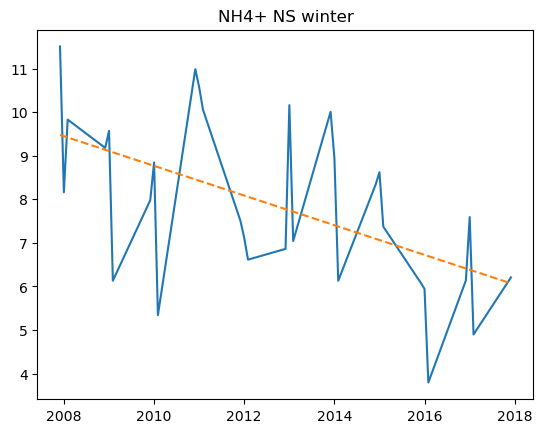

In [53]:

y = djfNS['date'].map(pd.Timestamp.toordinal)
slopens, intercept, r_value, p_valuens, std_err = stats.linregress(y,djfNS['NH4+'])


# reslt using linear regression
lin = []
for i in y:
    lin.append(slopens*i+intercept)


plt.show()
print('NS DJF')
print(slopens,'*x + ',intercept)
print(p_value)

# plt.plot(djfNS['date'], djfNS['Teflon Mass'])
plt.plot(djfNS['date'], djfNS['NH4+'])
plt.plot(djfNS['date'], lin, linestyle = '--')
plt.title('NH4+ NS winter')

In [54]:
y = djfNH['date'].map(pd.Timestamp.toordinal)
slopenh, intercept, r_value, p_value, std_err = stats.linregress(y,djfNH['NH4+'])


# reslt using linear regression
lin = []
for i in range(len(djfNH)):
    lin.append(slopenh*i+intercept)


plt.show()
print('NH DJF')
print(slopenh,'*x + ',intercept)
print(p_value)

NH DJF
-0.0017365620021859921 *x +  1284.954621851913
0.013872215300382141


In [55]:
y = djfDG['date'].map(pd.Timestamp.toordinal)
slopedg, intercept, r_value, p_value, std_err = stats.linregress(y,djfDG['NH4+'])


# reslt using linear regression
lin = []
for i in range(len(djfDG)):
    lin.append(slopedg*i+intercept)


plt.show()
print('DG DJF')
print(slopedg,'*x + ',intercept)
print(p_value)

DG DJF
-0.0017109901246360494 *x +  1263.5920564174066
0.04733681736645766


In [122]:
y = range(len(djfGZ))
slopegz, intercept, r_value, p_value, std_err = stats.linregress(y,djfGZ['NH4+'])


# reslt using linear regression
lin = []
for i in range(len(djfGZ)):
    lin.append(slopegz*i+intercept)


plt.show()
print('GZ DJF')
print(slopegz,'*x + ',intercept)
print(p_value)

GZ DJF
-0.2544570724423908 *x +  11.327600978271619
0.001471965310092532


In [56]:
JJA = [jjaGZ, jjaDG, jjaNH, jjaNS]
DJF = [djfGZ, djfDG, djfNH, djfNS]

In [190]:
JJA = [jjaGZ, jjaDG, jjaNH, jjaNS]
jjaslopenh4 = []
jjapnh4 = []

y = djfNS['date'].map(pd.Timestamp.toordinal)

for i in JJA:
    slope, intercept, r_value, p_value, str_err = stats.linregress(range(len(i)), i['NH4+'])
    jjaslopenh4.append(slope)
    jjapnh4.append(p_value)

djfslopenh4 = []
djfpnh4 = []

for i in DJF:
    slope, intercept, r_value, p_value, str_err = stats.linregress(range(len(i)), i['NH4+'])
    djfslopenh4.append(slope)
    djfpnh4.append(p_value)

In [185]:
# Calculate max, min, and mean values while omitting NaN
data = [
    ["JJA", jjaslopenh4[0], jjaslopenh4[1],jjaslopenh4[2], jjaslopenh4[3]],
    ["DJF", djfslopenh4[0], djfslopenh4[1], djfslopenh4[2], djfslopenh4[3]],
    
]

# Print the results in a table
headers = ["linRegress slope NH4+", "GZ", "DG", "NH", "NS"]
print('for NH4+')
print(tabulate(data, headers=headers, tablefmt="grid"))

for NH4+
+-------------------------+--------------+-------------+--------------+--------------+
| linRegress slope NH4+   |           GZ |          DG |           NH |           NS |
+=========================+==============+=============+==============+==============+
| JJA                     | -0.000540099 | -0.00104978 | -0.000683465 | -0.000165246 |
+-------------------------+--------------+-------------+--------------+--------------+
| DJF                     | -0.00173314  | -0.00171099 | -0.00173656  | -0.0009327   |
+-------------------------+--------------+-------------+--------------+--------------+


In [126]:
print(pnh4)
print(djfpnh4)

[0.10552217589308976, 0.14606065292172324, 0.08073350000860273, 0.5711164587405937]
[0.001471965310092532, 0.03709020472718348, 0.007503546439568407, 0.0010670778694604208]


In [189]:
jjaslopeno3 = []
jjapno3 = []

for i in JJA:
    slope, intercept, r_value, p_value, str_err = stats.linregress(range(len(i)), i['NO3-'])
    jjaslopeno3.append(slope)
    jjapno3.append(p_value)

In [188]:
djfslopeno3 = []
djfpno3 = []

for i in DJF:
    slope, intercept, r_value, p_value, str_err = stats.linregress(range(len(i)), i['NO3-'])
    djfslopeno3.append(slope)
    djfpno3.append(p_value)

In [70]:
data = [
    ["JJA", jjaslopeno3[0], jjaslopeno3[1],jjaslopeno3[2], jjaslopeno3[3]],
    ["DJF", djfslopeno3[0], djfslopeno3[1],djfslopeno3[2], djfslopeno3[3]],
    
]

# Print the results in a table
headers = ["NO3-", "GZ", "DG", "NH", "NS"]
#print('for NH4+')
print(tabulate(data, headers=headers, tablefmt="grid"))
print(jjapno3)
print(djfpno3)

+--------+-------------+--------------+--------------+--------------+
| NO3-   |          GZ |           DG |           NH |           NS |
+========+=============+==============+==============+==============+
| JJA    | -0.00031137 | -0.000844809 | -0.000566453 | -5.09845e-05 |
+--------+-------------+--------------+--------------+--------------+
| DJF    | -0.00218581 | -0.00206202  | -0.00186012  | -0.00105868  |
+--------+-------------+--------------+--------------+--------------+
[0.2966709966930724, 0.143164799875063, 0.07796130957122016, 0.7830556164562295]
[0.011535225063089016, 0.08497784988771902, 0.052351185297252106, 0.02500324958187937]


In [191]:
jjaslopeso4 = []
jjapso4 = []

for i in JJA:
    slope, intercept, r_value, p_value, str_err = stats.linregress(range(len(i)), i['SO4='])
    jjaslopeso4.append(slope)
    jjapso4.append(p_value)

djfslopeso4 = []
djfpso4 = []

for i in DJF:
    slope, intercept, r_value, p_value, str_err = stats.linregress(range(len(i)), i['SO4='])
    djfslopeso4.append(slope)
    djfpso4.append(p_value)

In [192]:
data = [
    ["JJA", jjaslopeso4[0], jjaslopeso4[1],jjaslopeso4[2], jjaslopeso4[3]],
    ["DJF", djfslopeso4[0], djfslopeso4[1],djfslopeso4[2], djfslopeso4[3]],
    
]

# Print the results in a table
headers = ["SO4=", "GZ", "DG", "NH", "NS"]
#print('for NH4+')
print(tabulate(data, headers=headers, tablefmt="grid"))
print(jjapso4)
print(djfpso4)

+--------+-----------+-----------+-----------+-----------+
| SO4=   |        GZ |        DG |        NH |        NS |
+========+===========+===========+===========+===========+
| JJA    | -0.16598  | -0.207674 | -0.19487  | -0.116201 |
+--------+-----------+-----------+-----------+-----------+
| DJF    | -0.510431 | -0.267764 | -0.439779 | -0.329519 |
+--------+-----------+-----------+-----------+-----------+
[0.04409670343676841, 0.19312098762400248, 0.07017258571429043, 0.05501259908439578]
[0.002042569100361699, 0.13999205513438717, 0.005048499929115837, 3.808603333530949e-05]


In [193]:
jjaslopecl = []
jjapcl = []

for i in JJA:
    slope, intercept, r_value, p_value, str_err = stats.linregress(range(len(i)), i['Cl-'])
    jjaslopecl.append(slope)
    jjapcl.append(p_value)

djfslopecl = []
djfpcl = []

for i in DJF:
    slope, intercept, r_value, p_value, str_err = stats.linregress(range(len(i)), i['Cl-'])
    djfslopecl.append(slope)
    djfpcl.append(p_value)

In [194]:
data = [
    ["JJA", jjaslopecl[0], jjaslopecl[1],jjaslopecl[2], jjaslopecl[3]],
    ["DJF", djfslopecl[0], djfslopecl[1],djfslopecl[2], djfslopecl[3]],
    
]

# Print the results in a table
headers = ["Cl-", "GZ", "DG", "NH", "NS"]
#print('for NH4+')
print(tabulate(data, headers=headers, tablefmt="grid"))
print(jjapcl)
print(djfpcl)

+-------+------------+------------+------------+------------+
| Cl-   |         GZ |         DG |         NH |         NS |
+=======+============+============+============+============+
| JJA   | -0.0159932 | -0.0112682 | -0.0220722 | -0.0021741 |
+-------+------------+------------+------------+------------+
| DJF   | -0.0685861 | -0.0682495 | -0.177114  | -0.0266207 |
+-------+------------+------------+------------+------------+
[0.026892445047098427, 0.3015630921722634, 0.020740295389824987, 0.4998869507820969]
[0.018878390645659424, 0.05611508034939292, 0.014123487191001538, 0.06425416194493544]


In [195]:
jjaslopeOM = []
jjapOM = []

for i in JJA:
    slope, intercept, r_value, p_value, str_err = stats.linregress(range(len(i)), i['OM'])
    jjaslopeOM.append(slope)
    jjapOM.append(p_value)

djfslopeOM = []
djfpOM = []

for i in DJF:
    slope, intercept, r_value, p_value, str_err = stats.linregress(range(len(i)), i['OM'])
    djfslopeOM.append(slope)
    djfpOM.append(p_value)

In [196]:
jjaslopePM = []
jjapPM = []

for i in JJA:
    slope, intercept, r_value, p_value, str_err = stats.linregress(range(len(i)), i['Teflon Mass'])
    jjaslopePM.append(slope)
    jjapPM.append(p_value)

djfslopePM = []
djfpPM = []

for i in DJF:
    slope, intercept, r_value, p_value, str_err = stats.linregress(range(len(i)), i['Teflon Mass'])
    djfslopePM.append(slope)
    djfpPM.append(p_value)

In [78]:
# data = [
#     ["JJA", jjaslopeso4[0], jjaslopeso4[1],jjaslopeso4[2], jjaslopeso4[3]],
#     ["DJF", djfslopeso4[0], djfslopeso4[1],djfslopeso4[2], djfslopeso4[3]],
    
# ]

# # Print the results in a table
# headers = ["OM", "GZ", "DG", "NH", "NS"]
# #print('for NH4+')
# print(tabulate(data, headers=headers, tablefmt="grid"))
# print('p_value JJA', jjapOM)
# print('p_value DJF', djfpOM)

In [197]:
jjaslopeMD = []
jjapMD = []

for i in JJA:
    slope, intercept, r_value, p_value, str_err = stats.linregress(range(len(i)), i['MD'])
    jjaslopeMD.append(slope)
    jjapMD.append(p_value)

djfslopeMD = []
djfpMD = []

for i in DJF:
    slope, intercept, r_value, p_value, str_err = stats.linregress(range(len(i)), i['MD'])
    djfslopeMD.append(slope)
    djfpMD.append(p_value)

In [198]:
data = [
    ["JJA", jjaslopeMD[0], jjaslopeMD[1],jjaslopeMD[2], jjaslopeMD[3]],
    ["DJF", djfslopeMD[0], djfslopeMD[1],djfslopeMD[2], djfslopeMD[3]],
    
]

# Print the results in a table
headers = ["MD", "GZ", "DG", "NH", "NS"]
#print('for NH4+')
print(tabulate(data, headers=headers, tablefmt="grid"))
print('p_value JJA', jjapMD)
print('p_value DJF', djfpMD)

+------+------------+------------+-----------+------------+
| MD   |         GZ |         DG |        NH |         NS |
+======+============+============+===========+============+
| JJA  | -0.0447469 | -0.013619  | 0.0368344 | -0.0381325 |
+------+------------+------------+-----------+------------+
| DJF  | -0.113121  |  0.0138416 | 0.0505501 | -0.0884881 |
+------+------------+------------+-----------+------------+
p_value JJA [0.05509656060395927, 0.7742737286302628, 0.17791292803857744, 0.0029559084973551884]
p_value DJF [0.018747862070000697, 0.8570676596460443, 0.42291096321364363, 0.0009340408425114277]


In [199]:
for i in range(4):
    print(jjaslopeMD[i], jjaslopeOM[i],jjaslopenh4[i],jjaslopeno3[i], jjaslopecl[i], jjaslopeso4[i])

-0.04474691174403055 0.037525315980500164 -0.06402970816397671 -0.033180201267332364 -0.01599318179730859 -0.16598010197233287
-0.013619022545548557 0.005588892214946394 -0.10253112579004346 -0.08642115740969018 -0.01126819877811465 -0.2076742768873804
0.03683439194778613 -0.12447684866247127 -0.08536491152689077 -0.07618078238148743 -0.02207217711698134 -0.19487017964526607
-0.03813254414387168 -0.05268252524796235 -0.014827223204290724 -0.0033537079575319435 -0.002174101109299564 -0.11620073217929416


In [200]:
jjagz = [jjaslopeso4[0], jjaslopenh4[0], jjaslopeno3[0],jjaslopeMD[0], jjaslopecl[0]]
jjadg = [jjaslopeso4[1], jjaslopenh4[1], jjaslopeno3[1],jjaslopeMD[1], jjaslopecl[1]]
jjanh = [jjaslopeso4[2], jjaslopenh4[2], jjaslopeno3[2],jjaslopeMD[2], jjaslopecl[2]]
jjans = [jjaslopeso4[3], jjaslopenh4[3], jjaslopeno3[3],jjaslopeMD[3], jjaslopecl[3]]

djfgz = [djfslopeso4[0], djfslopenh4[0], djfslopeno3[0],djfslopeMD[0], djfslopecl[0]]
djfdg = [djfslopeso4[1], djfslopenh4[1], djfslopeno3[1],djfslopeMD[1], djfslopecl[1]]
djfnh = [djfslopeso4[2], djfslopenh4[2], djfslopeno3[2],djfslopeMD[2], djfslopecl[2]]
djfns = [djfslopeso4[3], djfslopenh4[3], djfslopeno3[3],djfslopeMD[3], djfslopecl[3]]

In [201]:
data = [
    ['GZ', jjagz[0], jjagz[1], jjagz[2], jjagz[3], jjagz[4], jjaslopeOM[0], jjaslopePM[0]],
    ['DG', jjadg[0], jjadg[1], jjadg[2], jjadg[3], jjadg[4], jjaslopeOM[1], jjaslopePM[1]],
    ['NH', jjanh[0], jjanh[1], jjanh[2], jjanh[3], jjanh[4], jjaslopeOM[2], jjaslopePM[2]],
    ['NS', jjans[0], jjans[1], jjans[2], jjans[3], jjans[4], jjaslopeOM[3], jjaslopePM[3]],
]

headers = ["LinRegressSlope", "SO4=", "NH4+", "NO3-", "MD", "Cl-", "OM", "PM"]
print('slope for Linear Regression for monthly data （ug/m\N{SUPERSCRIPT THREE} per month) Summer')
print(tabulate(data, headers=headers, tablefmt='grid'))

slope for Linear Regression for monthly data （ug/m³ per month) Summer
+-------------------+-----------+------------+-------------+------------+------------+-------------+-----------+
| LinRegressSlope   |      SO4= |       NH4+ |        NO3- |         MD |        Cl- |          OM |        PM |
+===================+===========+============+=============+============+============+=============+===========+
| GZ                | -0.16598  | -0.0640297 | -0.0331802  | -0.0447469 | -0.0159932 |  0.0375253  | -0.495068 |
+-------------------+-----------+------------+-------------+------------+------------+-------------+-----------+
| DG                | -0.207674 | -0.102531  | -0.0864212  | -0.013619  | -0.0112682 |  0.00558889 | -0.430272 |
+-------------------+-----------+------------+-------------+------------+------------+-------------+-----------+
| NH                | -0.19487  | -0.0853649 | -0.0761808  |  0.0368344 | -0.0220722 | -0.124477   | -0.713492 |
+-------------------+-----

In [202]:
'''multiple the by 3 to get change per year '''

data = [
    ['GZ', jjagz[0]*3, jjagz[1]*3, jjagz[2]*3, jjagz[3]*3,  jjaslopePM[0]*3],
    ['DG', jjadg[0]*3, jjadg[1]*3, jjadg[2]*3, jjadg[3]*3,  jjaslopePM[1]*3],
    ['NH', jjanh[0]*3, jjanh[1]*3, jjanh[2]*3, jjanh[3]*3,  jjaslopePM[2]*3],
    ['NS', jjans[0]*3, jjans[1]*3, jjans[2]*3, jjans[3]*3,  jjaslopePM[3]*3],
]

headers = ["change per year", "SO4=", "NH4+", "NO3-", "MD", "PM"]
print('rate of change （ug/m\N{SUPERSCRIPT THREE} per year) Summer')
print(tabulate(data, headers=headers, tablefmt='grid'))

rate of change （ug/m³ per year) Summer
+-------------------+-----------+------------+------------+------------+-----------+
| change per year   |      SO4= |       NH4+ |       NO3- |         MD |        PM |
+===================+===========+============+============+============+===========+
| GZ                | -0.49794  | -0.192089  | -0.0995406 | -0.134241  | -1.48521  |
+-------------------+-----------+------------+------------+------------+-----------+
| DG                | -0.623023 | -0.307593  | -0.259263  | -0.0408571 | -1.29082  |
+-------------------+-----------+------------+------------+------------+-----------+
| NH                | -0.584611 | -0.256095  | -0.228542  |  0.110503  | -2.14048  |
+-------------------+-----------+------------+------------+------------+-----------+
| NS                | -0.348602 | -0.0444817 | -0.0100611 | -0.114398  | -0.443676 |
+-------------------+-----------+------------+------------+------------+-----------+


In [141]:
# seems something wrong with slope PM for GZ



In [203]:
data = [
    ['GZ', djfgz[0], djfgz[1], djfgz[2], djfgz[3], djfgz[4],  djfslopeOM[0], djfslopePM[0]],
    ['DG', djfdg[0], djfdg[1], djfdg[2], djfdg[3], djfdg[4],  djfslopeOM[0], djfslopePM[1]],
    ['NH', djfnh[0], djfnh[1], djfnh[2], djfnh[3], djfnh[4],  djfslopeOM[0], djfslopePM[2]],
    ['NS', djfns[0], djfns[1], djfns[2], djfns[3], djfns[4],  djfslopeOM[0], djfslopePM[3]],
]

headers = ["LinRegressSlope", "SO4=", "NH4+", "NO3-", "MD", "Cl-", "OM", "PM"]
print('slope for Linear Regression for monthly data （ug/m\N{SUPERSCRIPT THREE} per month) Winter')
print(tabulate(data, headers=headers, tablefmt='grid'))

slope for Linear Regression for monthly data （ug/m³ per month) Winter
+-------------------+-----------+-----------+-----------+------------+------------+-----------+----------+
| LinRegressSlope   |      SO4= |      NH4+ |      NO3- |         MD |        Cl- |        OM |       PM |
+===================+===========+===========+===========+============+============+===========+==========+
| GZ                | -0.510431 | -0.254457 | -0.317643 | -0.113121  | -0.0685861 | -0.780835 | -2.52019 |
+-------------------+-----------+-----------+-----------+------------+------------+-----------+----------+
| DG                | -0.267764 | -0.218162 | -0.267076 |  0.0138416 | -0.0682495 | -0.780835 | -1.96086 |
+-------------------+-----------+-----------+-----------+------------+------------+-----------+----------+
| NH                | -0.439779 | -0.277077 | -0.304084 |  0.0505501 | -0.177114  | -0.780835 | -2.82522 |
+-------------------+-----------+-----------+-----------+------------+----

In [280]:
jjapcl

[0.026892445047098427,
 0.3015630921722634,
 0.020740295389824987,
 0.4998869507820969]

In [204]:
data = [
    ['GZ', jjapso4[0], jjapnh4[0], jjapno3[0], jjapMD[0], jjapcl[0], jjapOM[0], jjapPM[0]],
    ['DG', jjapso4[1], jjapnh4[1], jjapno3[1], jjapMD[1], jjapcl[1], jjapOM[1], jjapPM[1]],
    ['NH', jjapso4[2], jjapnh4[2], jjapno3[2], jjapMD[2], jjapcl[2], jjapOM[2], jjapPM[2]],
    ['NS', jjapso4[3], jjapnh4[3], jjapno3[3], jjapMD[3], jjapcl[3], jjapOM[3], jjapPM[3]],
]

headers = ["p_value", "SO4=", "NH4+", "NO3-", "MD", "Cl-", "OM", "PM"]
print('p_value for Linear Regression for monthly data （ug/m\N{SUPERSCRIPT THREE} per month) Summer')
print(tabulate(data, headers=headers, tablefmt='grid'))

p_value for Linear Regression for monthly data （ug/m³ per month) Summer
+-----------+-----------+-----------+----------+------------+-----------+----------+-----------+
| p_value   |      SO4= |      NH4+ |     NO3- |         MD |       Cl- |       OM |        PM |
+===========+===========+===========+==========+============+===========+==========+===========+
| GZ        | 0.0440967 | 0.105522  | 0.434306 | 0.0550966  | 0.0268924 | 0.626614 | 0.0879855 |
+-----------+-----------+-----------+----------+------------+-----------+----------+-----------+
| DG        | 0.193121  | 0.146061  | 0.225978 | 0.774274   | 0.301563  | 0.97306  | 0.340794  |
+-----------+-----------+-----------+----------+------------+-----------+----------+-----------+
| NH        | 0.0701726 | 0.0807335 | 0.101213 | 0.177913   | 0.0207403 | 0.481703 | 0.0431476 |
+-----------+-----------+-----------+----------+------------+-----------+----------+-----------+
| NS        | 0.0550126 | 0.571116  | 0.881876 | 0.0029

In [205]:
data = [
    ['GZ', djfpso4[0], djfpnh4[0], djfpno3[0], djfpMD[0], djfpcl[0], djfpOM[0], djfpPM[0]],
    ['DG', djfpso4[1], djfpnh4[1], djfpno3[1], djfpMD[1], djfpcl[1], djfpOM[1], djfpPM[1]],
    ['NH', djfpso4[2], djfpnh4[2], djfpno3[2], djfpMD[2], djfpcl[2], djfpOM[2], djfpPM[2]],
    ['NS', djfpso4[3], djfpnh4[3], djfpno3[3], djfpMD[3], djfpcl[3], djfpOM[3], djfpPM[3]],
]

headers = ["p_value", "SO4=", "NH4+", "NO3-", "MD", "Cl-", "OM", "PM"]
print('p_value for Linear Regression for monthly data （ug/m\N{SUPERSCRIPT THREE} per month) Winter')
print(tabulate(data, headers=headers, tablefmt='grid'))

p_value for Linear Regression for monthly data （ug/m³ per month) Winter
+-----------+------------+------------+-----------+-------------+-----------+------------+-------------+
| p_value   |       SO4= |       NH4+ |      NO3- |          MD |       Cl- |         OM |          PM |
+===========+============+============+===========+=============+===========+============+=============+
| GZ        | 0.00204257 | 0.00147197 | 0.010072  | 0.0187479   | 0.0188784 | 0.00454694 | 0.000632463 |
+-----------+------------+------------+-----------+-------------+-----------+------------+-------------+
| DG        | 0.139992   | 0.0370902  | 0.0658444 | 0.857068    | 0.0561151 | 0.0471048  | 0.0521014   |
+-----------+------------+------------+-----------+-------------+-----------+------------+-------------+
| NH        | 0.0050485  | 0.00750355 | 0.0311669 | 0.422911    | 0.0141235 | 0.017509   | 0.0238179   |
+-----------+------------+------------+-----------+-------------+-----------+-----------

In [89]:
y='r\N{SUPERSCRIPT TWO}'
y

'r²'

In [191]:
# speciesDG.iloc[12:24]

In [171]:
speciesDG.iloc[12:14,2]

12    81.182672
13    51.836548
Name: Teflon Mass, dtype: float64

In [90]:
# sum2009 = []
# for i in range(12,24):
#     sum2009.append(speciesDG.iloc[i,2:].sum())

rows = speciesDG.iloc[12:24, 2:]
sum2009 = rows.sum()

In [91]:
#sum2009

In [92]:

rows = speciesDG.iloc[72:83, 2:]
sum2014 = rows.sum()

In [190]:
speciesDG.columns

Index(['Unnamed: 0', 'date', 'Teflon Mass', 'NH4+', 'K+', 'Cl-', 'NO3-',
       'SO4=', 'OC_TOT', 'EC_TOT', 'K', 'Ca', 'OM', 'TC_TOR', 'Aluminum',
       'Silicon', 'Sulfur', 'Chlorine', 'Potassium', 'Calcium', 'Manganese',
       'Iron', 'T Mass', 'Al', 'Si', 'Mn', 'Fe', 'MD', 'species'],
      dtype='object')

In [208]:
sum2009['Cl-']

15.394325908634576

Text(0, 0.5, 'concentration (ug/m₃)')

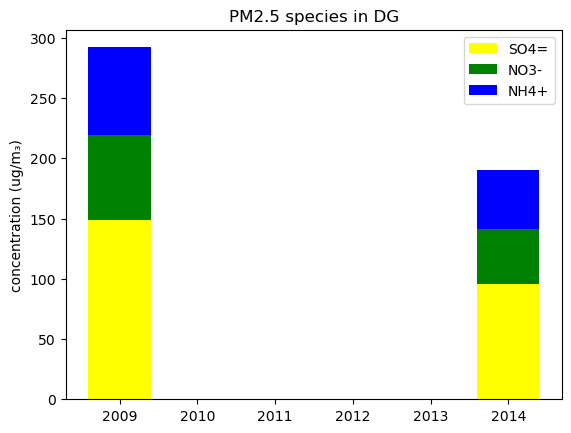

In [98]:
plt.bar(2009, sum2009['SO4='], color= 'yellow', label = 'SO4=')
plt.bar(2009, sum2009['NO3-'], bottom = sum2009['SO4='], color='g',label = 'NO3-')
plt.bar(2009, sum2009['NH4+'], bottom = sum2009['SO4=']+sum2009['NO3-'], color = 'b',label='NH4+')

plt.bar(2014, sum2014['SO4='], color='yellow')
plt.bar(2014, sum2014['NO3-'], bottom = sum2014['SO4='], color='g')
plt.bar(2014, sum2014['NH4+'], bottom = sum2014['SO4=']+sum2014['NO3-'],color='b')


# plt.xticks(range(0, len(speciesDG.index), 12), speciesDG.index[::12])

# plt.plot(speciesDG['Teflon Mass'], linestyle='dashdot',color='black')
# plt.plot(speciesDG['T Mass'],linestyle='dashdot',color='black')

plt.title('PM2.5 species in DG')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

In [116]:
rows = speciesGZ.iloc[12:24, 2:]
gzsum2009 = rows.sum()

rows = speciesGZ.iloc[84:96, 2:]
gzsum2014 = rows.sum()

rows = speciesGZ.iloc[96:108, 2:]
gzsum2017 = rows.sum()

Text(0, 0.5, 'concentration (ug/m₃)')

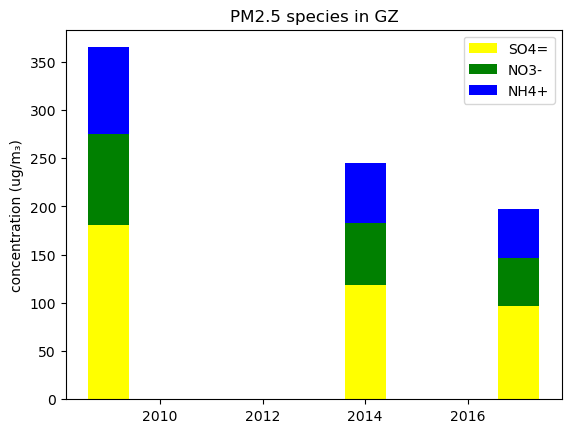

In [117]:
plt.bar(2009, gzsum2009['SO4='], color= 'yellow', label = 'SO4=')
plt.bar(2009, gzsum2009['NO3-'], bottom = gzsum2009['SO4='], color='g',label = 'NO3-')
plt.bar(2009, gzsum2009['NH4+'], bottom = gzsum2009['SO4=']+gzsum2009['NO3-'], color = 'b',label='NH4+')

plt.bar(2014, gzsum2014['SO4='], color='yellow')
plt.bar(2014, gzsum2014['NO3-'], bottom = gzsum2014['SO4='], color='g')
plt.bar(2014, gzsum2014['NH4+'], bottom = gzsum2014['SO4=']+gzsum2014['NO3-'],color='b')

plt.bar(2017, gzsum2017['SO4='], color='yellow')
plt.bar(2017, gzsum2017['NO3-'], bottom = gzsum2017['SO4='], color='g')
plt.bar(2017, gzsum2017['NH4+'], bottom = gzsum2017['SO4=']+gzsum2017['NO3-'],color='b')


# plt.xticks(range(0, len(speciesDG.index), 12), speciesDG.index[::12])

# plt.plot(speciesDG['Teflon Mass'], linestyle='dashdot',color='black')
# plt.plot(speciesDG['T Mass'],linestyle='dashdot',color='black')

plt.title('PM2.5 species in GZ')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

In [246]:
#speciesGZ.iloc[96:]

In [104]:
rows = speciesNH.iloc[:12, 2:]
nhsum2008 = rows.sum()

rows = speciesNH.iloc[84:96, 2:]
nhsum2017 = rows.sum()

rows = speciesNH.iloc[72:84, 2:]
nhsum2014 = rows.sum()

Text(0, 0.5, 'concentration (ug/m₃)')

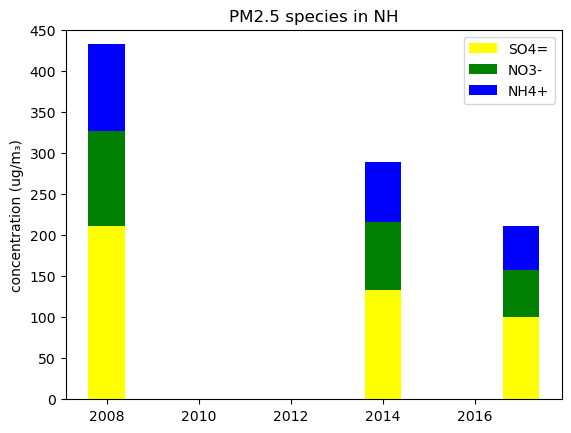

In [122]:
plt.bar(2008, nhsum2008['SO4='], color= 'yellow', label = 'SO4=')
plt.bar(2008, nhsum2008['NO3-'], bottom = nhsum2008['SO4='], color='g',label = 'NO3-')
plt.bar(2008, nhsum2008['NH4+'], bottom = nhsum2008['SO4=']+nhsum2008['NO3-'], color = 'b',label='NH4+')

plt.bar(2014, nhsum2014['SO4='], color='yellow')
plt.bar(2014, nhsum2014['NO3-'], bottom = nhsum2014['SO4='], color='g')
plt.bar(2014, nhsum2014['NH4+'], bottom = nhsum2014['SO4=']+nhsum2014['NO3-'],color='b')

plt.bar(2017, nhsum2017['SO4='], color='yellow')
plt.bar(2017, nhsum2017['NO3-'], bottom = nhsum2017['SO4='], color='g')
plt.bar(2017, nhsum2017['NH4+'], bottom = nhsum2017['SO4=']+nhsum2017['NO3-'],color='b')


# plt.xticks(range(0, len(speciesDG.index), 12), speciesDG.index[::12])

# plt.plot(speciesDG['Teflon Mass'], linestyle='dashdot',color='black')
# plt.plot(speciesDG['T Mass'],linestyle='dashdot',color='black')

plt.ylim(0,450)

plt.title('PM2.5 species in NH')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

In [121]:
#speciesNS.iloc[96:107]

In [118]:
rows = speciesNS.iloc[24:36, 2:]
nssum2009 = rows.sum()

rows = speciesNS.iloc[84:96, 2:]
nssum2014 = rows.sum()

rows = speciesNS.iloc[-12:, 2:]
nssum2017 = rows.sum()

Text(0, 0.5, 'concentration (ug/m₃)')

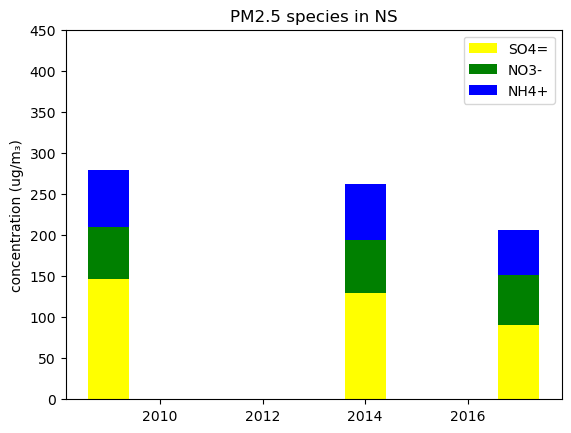

In [124]:
plt.bar(2009, nssum2009['SO4='], color= 'yellow', label = 'SO4=')
plt.bar(2009, nssum2009['NO3-'], bottom = nssum2009['SO4='], color='g',label = 'NO3-')
plt.bar(2009, nssum2009['NH4+'], bottom = nssum2009['SO4=']+nssum2009['NO3-'], color = 'b',label='NH4+')

plt.bar(2014, nssum2014['SO4='], color='yellow')
plt.bar(2014, nssum2014['NO3-'], bottom = nssum2014['SO4='], color='g')
plt.bar(2014, nssum2014['NH4+'], bottom = nssum2014['SO4=']+nssum2014['NO3-'],color='b')

plt.bar(2017, nssum2017['SO4='], color='yellow')
plt.bar(2017, nssum2017['NO3-'], bottom = nssum2017['SO4='], color='g')
plt.bar(2017, nssum2017['NH4+'], bottom = nssum2017['SO4=']+nssum2017['NO3-'],color='b')


# plt.xticks(range(0, len(speciesDG.index), 12), speciesDG.index[::12])

# plt.plot(speciesDG['Teflon Mass'], linestyle='dashdot',color='black')
# plt.plot(speciesDG['T Mass'],linestyle='dashdot',color='black')

plt.ylim(0,450)

plt.title('PM2.5 species in NS')
plt.legend()
plt.ylabel('concentration (ug/m\u2083)')

In [140]:
ns09 = nssum2009['NH4+'] +nssum2009['SO4=']+nssum2009['NO3-']
ns14 = nssum2014['NH4+'] +nssum2014['SO4=']+nssum2014['NO3-']
ns17 = nssum2017['NH4+'] +nssum2017['SO4=']+nssum2017['NO3-']

print(ns09, ns14, ns17)

278.6644685534882 262.1552599298277 206.25841407029225


In [143]:
print(ns09-ns14, 0.004*5)
print(ns09-ns17, 0.004*8)

16.50920862366047 0.02
72.40605448319593 0.032


PM2.5 NH DJF
nan *x +  nan
0.03473667211952521


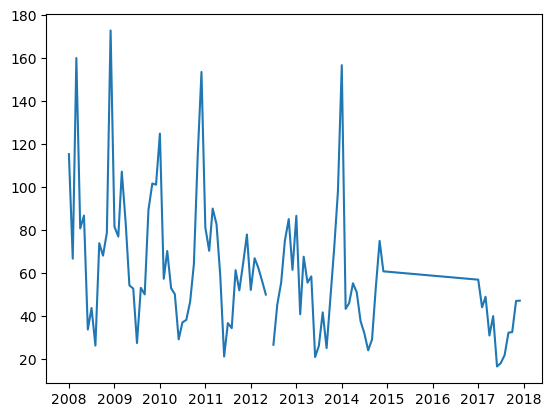

In [136]:
y = speciesNH['date'].map(pd.Timestamp.toordinal)
#print(y)
#print(len(djfNH['Teflon Mass']))
slope, intercept, r_value, p_value, std_err = linregress(y[:-12],speciesNH['NO3-'][:-12])


# reslt using linear regression
lin = []
for i in y:
    lin.append(slope*i+intercept)


print('PM2.5 NH DJF')
print(slope,'*x + ',intercept)
print(p_valuenh)

plt.plot(speciesNH['date'], speciesNH['Teflon Mass'],color='#1f77b4')
plt.plot(speciesNH['date'], lin, linestyle = '--',color='#ff7f0e')


Index(['Unnamed: 0', 'date', 'Teflon Mass', 'NH4+', 'K+', 'Cl-', 'NO3-',
       'SO4=', 'OC_TOT', 'EC_TOT', 'K', 'Ca', 'OM', 'Aluminum', 'Silicon',
       'Sulfur', 'Chlorine', 'Potassium', 'Calcium', 'Manganese', 'Iron', 'Al',
       'Si', 'Mn', 'Fe', 'PM2.5', 'Na', 'MD', 'species'],
      dtype='object')